In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data Preparation

In [2]:
# load data
data = pd.read_csv("iBeacon_RSSI_Labeled.csv", parse_dates= ['date'])

In [3]:
# inspect head
data.head()

location                date  b3001  b3002  b3003  b3004  b3005  b3006  \
0      O02 2016-10-18 11:15:21   -200   -200   -200   -200   -200    -78   
1      P01 2016-10-18 11:15:19   -200   -200   -200   -200   -200    -78   
2      P01 2016-10-18 11:15:17   -200   -200   -200   -200   -200    -77   
3      P01 2016-10-18 11:15:15   -200   -200   -200   -200   -200    -77   
4      P01 2016-10-18 11:15:13   -200   -200   -200   -200   -200    -77   

   b3007  b3008  b3009  b3010  b3011  b3012  b3013  
0   -200   -200   -200   -200   -200   -200   -200  
1   -200   -200   -200   -200   -200   -200   -200  
2   -200   -200   -200   -200   -200   -200   -200  
3   -200   -200   -200   -200   -200   -200   -200  
4   -200   -200   -200   -200   -200   -200   -200

In [4]:
# general inspection of data and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   location  1420 non-null   object        
 1   date      1420 non-null   datetime64[ns]
 2   b3001     1420 non-null   int64         
 3   b3002     1420 non-null   int64         
 4   b3003     1420 non-null   int64         
 5   b3004     1420 non-null   int64         
 6   b3005     1420 non-null   int64         
 7   b3006     1420 non-null   int64         
 8   b3007     1420 non-null   int64         
 9   b3008     1420 non-null   int64         
 10  b3009     1420 non-null   int64         
 11  b3010     1420 non-null   int64         
 12  b3011     1420 non-null   int64         
 13  b3012     1420 non-null   int64         
 14  b3013     1420 non-null   int64         
dtypes: datetime64[ns](1), int64(13), object(1)
memory usage: 166.5+ KB


In [5]:
# detect null values
data.isnull().sum()

location    0
date        0
b3001       0
b3002       0
b3003       0
b3004       0
b3005       0
b3006       0
b3007       0
b3008       0
b3009       0
b3010       0
b3011       0
b3012       0
b3013       0
dtype: int64

In [6]:
# Unique labels in the dataset
data.location.unique()

array(['O02', 'P01', 'P02', 'R01', 'R02', 'S01', 'S02', 'T01', 'U02',
       'U01', 'J03', 'K03', 'L03', 'M03', 'N03', 'O03', 'P03', 'Q03',
       'R03', 'S03', 'T03', 'U03', 'U04', 'T04', 'S04', 'R04', 'Q04',
       'P04', 'O04', 'N04', 'M04', 'L04', 'K04', 'J04', 'I04', 'I05',
       'J05', 'K05', 'L05', 'M05', 'N05', 'O05', 'P05', 'Q05', 'R05',
       'S05', 'T05', 'U05', 'S06', 'R06', 'Q06', 'P06', 'O06', 'N06',
       'M06', 'L06', 'K06', 'J06', 'I06', 'F08', 'J02', 'J07', 'I07',
       'I10', 'J10', 'D15', 'E15', 'G15', 'J15', 'L15', 'R15', 'T15',
       'W15', 'I08', 'I03', 'J08', 'I01', 'I02', 'J01', 'K01', 'K02',
       'L01', 'L02', 'M01', 'M02', 'N01', 'N02', 'O01', 'I09', 'D14',
       'D13', 'K07', 'K08', 'N15', 'P15', 'I15', 'S15', 'U15', 'V15',
       'S07', 'S08', 'L09', 'L08', 'Q02', 'Q01'], dtype=object)

In [7]:
# Number of unique labels
data.location.nunique()

105

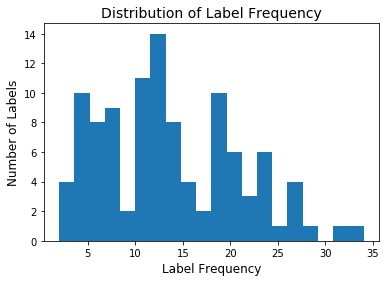

In [8]:
# distribution of labels

# data preparation
labelFreq = data.location.value_counts().values

# Plot
fig, ax = plt.subplots()
ax.hist(labelFreq, bins = 20)

# Plot config
ax.set_title('Distribution of Label Frequency', size = 14)
ax.set_ylabel('Number of Labels', size = 12)
ax.set_xlabel('Label Frequency', size = 12)


plt.show()

In [9]:
data['location'].value_counts().head(20)

K04    34
J04    32
J06    29
J07    27
I07    27
I06    27
I08    26
K05    25
J03    24
O05    24
O04    24
Q05    24
K03    23
S01    23
K06    22
J02    22
L06    22
I02    21
S02    21
M06    20
Name: location, dtype: int64

In [10]:
# returns 1 if a data point is out of bounds of the possible values of the dataset [-200,0]
def countOutOfBounds(x):
    if x < -200 or x > 0:
        return 1
    else:
        return 0

# detects presence of value less than -200 or greater than 0 on the RSSI columns
# maps detection function to each item on a series
print('BEACON \t\t NO. OUT OF BOUNDS')
for index in range(2,15):
    temp = data.iloc[:,index]
    numInvalid = np.array(list(map(countOutOfBounds, temp))).sum()
    print('{} \t : \t {}'.format(temp.name, numInvalid))

BEACON 		 NO. OUT OF BOUNDS
b3001 	 : 	 0
b3002 	 : 	 0
b3003 	 : 	 0
b3004 	 : 	 0
b3005 	 : 	 0
b3006 	 : 	 0
b3007 	 : 	 0
b3008 	 : 	 0
b3009 	 : 	 0
b3010 	 : 	 0
b3011 	 : 	 0
b3012 	 : 	 0
b3013 	 : 	 0


In [11]:
# returns 1 if data point is an actual reading (i.e. value != -200)
def countValidSignal(x):
    if x > -200:
        return 1
    else:
        return 0

print('Total Rows : {}\n'.format(data.shape[0]))
print('BEACON \t FREQ \t PROP')
for index in range(2,15):
    temp = data.iloc[:,index]
    num = np.array(list(map(countValidSignal, temp))).sum()
    prop = round(num/temp.shape[0],2)
    
    print('{} \t {} \t {}'.format(temp.name, num, prop))

Total Rows : 1420

BEACON 	 FREQ 	 PROP
b3001 	 25 	 0.02
b3002 	 497 	 0.35
b3003 	 280 	 0.2
b3004 	 402 	 0.28
b3005 	 247 	 0.17
b3006 	 287 	 0.2
b3007 	 50 	 0.04
b3008 	 91 	 0.06
b3009 	 31 	 0.02
b3010 	 29 	 0.02
b3011 	 25 	 0.02
b3012 	 35 	 0.02
b3013 	 44 	 0.03


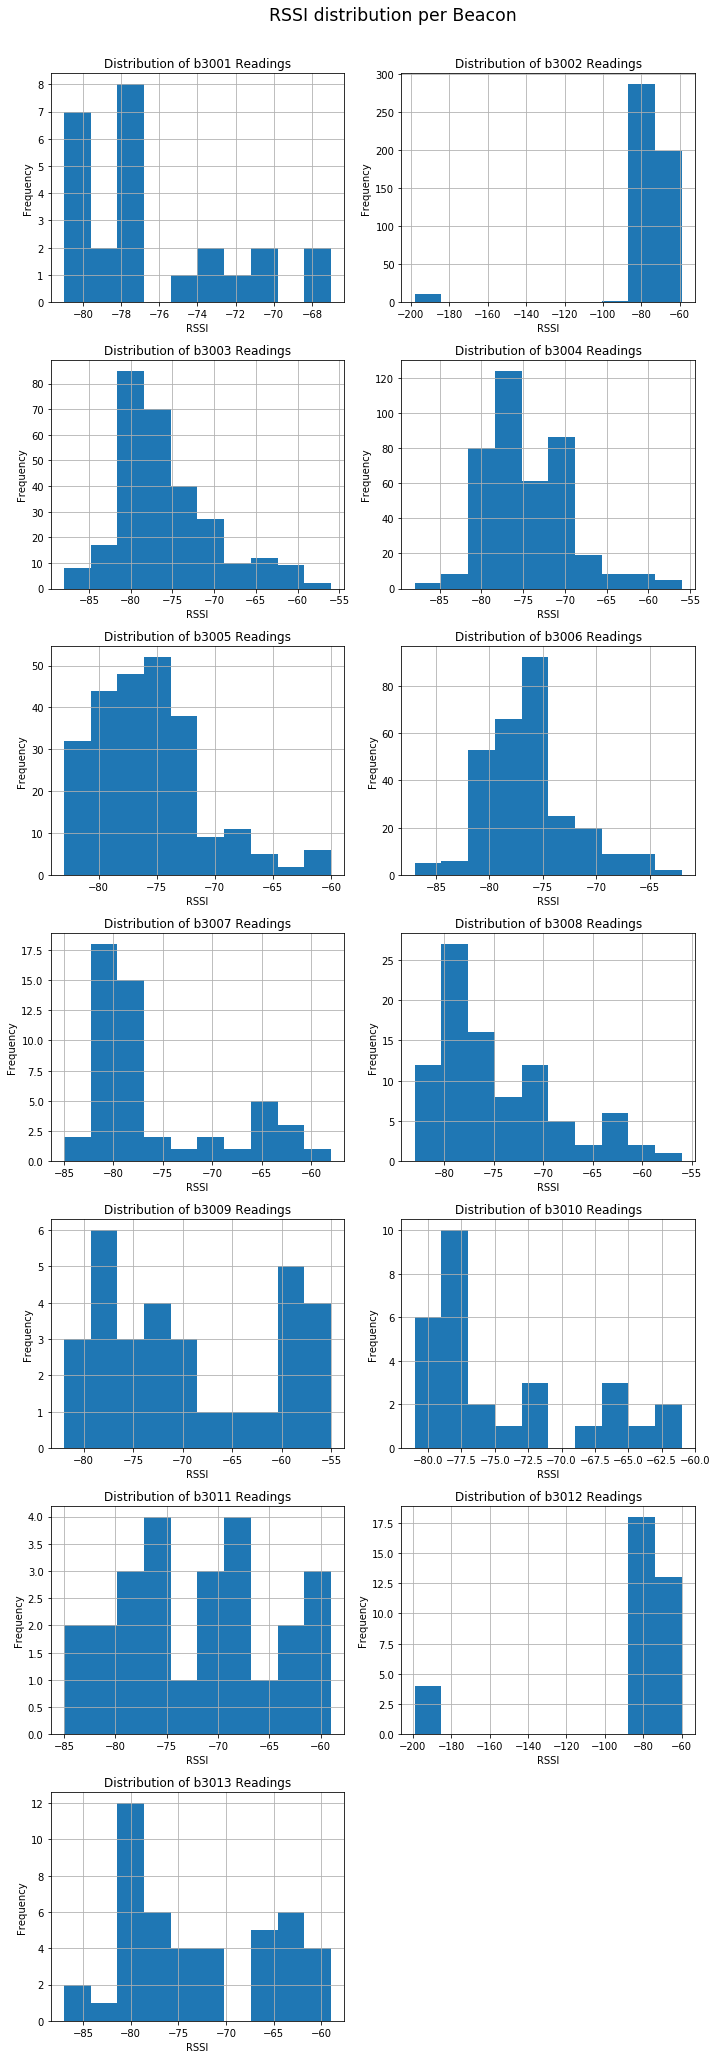

In [12]:
# PLOT HISTOGRAM OF RSSI FROM ALL BEACONS
# create figure and add axes
fig, axs = plt.subplots(nrows = 7, ncols = 2, figsize = (10,7*4), tight_layout = True)
fig.suptitle("RSSI distribution per Beacon", y = 1.02, x = 0.55, size = 'xx-large')

beacons = data.iloc[:,2:15]
numCols = 2

for i in range(beacons.shape[1]):
    r = int(i/numCols)
    c = i % numCols
    ax = axs[r][c]
    
    mask = beacons.iloc[:,i] > -200
    X = beacons[mask].iloc[:,i]
    
    ax.set_title('Distribution of ' + X.name + ' Readings')
    ax.set_xlabel('RSSI')
    ax.set_ylabel('Frequency')
    X.hist(ax = ax)
    
axs[6][1].remove()
plt.show()

In [13]:
# remove erroneous datapoints found in b3002 and b3012 readings
data = data[(data['b3002'] <= -200) | (data['b3002'] > -180)]
data = data[(data['b3012'] <= -200) | (data['b3012'] > -180)]

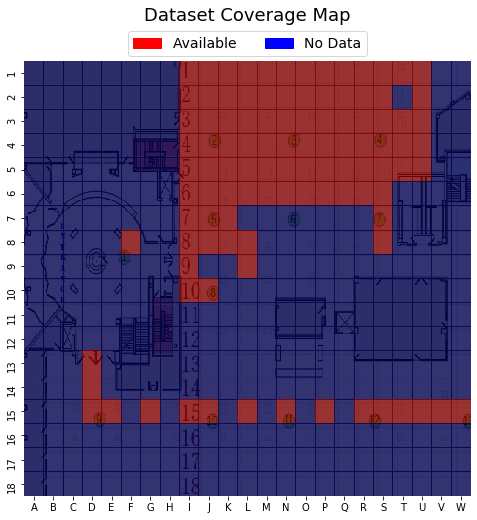

In [14]:
import seaborn as sns
import matplotlib.image as mpimg 
import math
from matplotlib.patches import Patch

handle = [Patch(facecolor='r', edgecolor='r', label='Available'),
          Patch(facecolor='b', edgecolor='b', label='No Data')]

# data
temp = data['location'].value_counts()

# generate blank array to represent the floor layout
letters =  ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W']
space = pd.DataFrame(data = np.zeros((18,23)), 
                    columns = letters,
                    index = range(1,19))
    
# plot mean RSSI values to space array
for i in range(temp.shape[0]):
    loc = temp.index[i]
    x_char = loc[0]
    y_int = int(loc[1:])
    space[x_char][y_int] = 1
    
# ================================= VISUALIZATION =================================== 
    
fig, ax1 = plt.subplots(figsize = (8,8), tight_layout = False)
    
# Plot values over floor layout
map_img = mpimg.imread('iBeacon_Layout_2.jpg')
hmax = sns.heatmap(space,
            cmap = 'seismic',
            cbar = False,
            alpha = 0.8, 
            zorder = 2, 
            ax = ax1)
ax1.imshow(map_img,
            aspect = hmax.get_aspect(),
            extent = hmax.get_xlim() + hmax.get_ylim(),
            zorder = 1)
# plot 1 config
title = "Dataset Coverage Map"
ax1.set_title(title, fontdict = {'size': 18}, pad = 40)

ax1.legend(handles = handle, bbox_to_anchor = (0.50, 1.04), loc = 'center', ncol = 2, fontsize = 14)
plt.show()

# Data Exploration

### Propagation of Signal in Space

In [15]:
# maps a label to coordinate system using X and Y coordinates
def convert_Label2XY(location):
    letters = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W']
    
    letter = location[0]
    x_target = letters.index(letter) + 1
    y_target = int(location[1:])
    
    return x_target, y_target

In [16]:
# compute distance to beacon
from math import sqrt
def calc_Distance2Beacon(location, beacon):
    beaconLocation = {'b3001' : [6,9], 'b3002' : [10,4], 'b3003' : [14,4], 'b3004' : [19,4],
                      'b3005' : [10,7], 'b3006' : [14,7], 'b3007' : [19,7], 'b3008' : [10,10],
                      'b3009' : [4,15], 'b3010' : [10,15], 'b3011' : [14,15], 'b3012' : [18, 15],
                      'b3013' : [23, 15]}
    
    x_target, y_target = convert_Label2XY(location)
    
    x_beacon, y_beacon = beaconLocation[beacon]
    
    return round(sqrt((x_target - x_beacon)**2 + (y_target - y_beacon)**2),2)

In [17]:
# https://stackoverflow.com/questions/50091591/plotting-seaborn-heatmap-on-top-of-a-background-picture?rq=1
import seaborn as sns
import matplotlib.image as mpimg 
import math

def plot_Signal2Space(beacon):
    
    sns.set_style('darkgrid')
    
    # ================================= DATA PREPARATION ===================================
    
    # Copy target location and RSSI values of target beacon & filter to include valid signals only
    target = data[['location', beacon]].copy()
    filtered = target[target[beacon] > -200]

    # Generate DF for mean RSSI values by grid location
    meanByLoc = filtered.pivot_table(values = [beacon], index = ['location'], aggfunc = np.mean)
    
    # generate blank array to represent the floor layout
    letters =  ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W']
    space = pd.DataFrame(data = np.full((18,23), min(meanByLoc[beacon]) - 3), 
                     columns = letters,
                     index = range(1,19))
    
    # plot mean RSSI values to space array
    for i in range(meanByLoc.shape[0]):
        loc = meanByLoc.index[i]
        x_char = loc[0]
        y_int = int(loc[1:])
        space[x_char][y_int] = int(meanByLoc.values[i])
    
    # Convert location labels to euclidean distance of location to beacon
    rssiByDist = pd.DataFrame(data = np.zeros((len(filtered), 2)),
                            columns = ['dist', beacon])
    d = 0
    filtered.iloc[d,1]
    for d in range(len(filtered)):
        rssiByDist.iloc[d,1] = filtered.iloc[d,1]
        rssiByDist.iloc[d,0] = calc_Distance2Beacon(filtered.iloc[d,0], filtered.iloc[:,1].name)
    
    # Generate DF for mean RSSI values with distance to beacon as label
    meanByDist = rssiByDist.pivot_table(values = [beacon], index = ['dist'], aggfunc = np.mean)
    
    # ================================= VISUALIZATION =================================== 
    
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8), tight_layout = False)
    
    # Plot meanByLoc over floor layout
    map_img = mpimg.imread('iBeacon_Layout_2.jpg')
    hmax = sns.heatmap(space,
                cmap = 'gist_heat',
                alpha = 0.8, 
                zorder = 2, 
                vmin = min(meanByLoc[beacon]) - 3, 
                vmax = max(meanByLoc[beacon]),
                ax = ax1)
    ax1.imshow(map_img,
              aspect = hmax.get_aspect(),
              extent = hmax.get_xlim() + hmax.get_ylim(),
              zorder = 1)
    # plot 1 config
    title = "RSSI map for " + beacon
    ax1.set_title(title, fontdict = {'size': 18}, pad = 20)
    
    # Plot RSSI values by distance with mean RSSI trend line
    ax2.scatter(x = rssiByDist['dist'], y = rssiByDist[beacon], alpha = 0.8, label = "Raw RSSI values")
    ax2.plot(meanByDist.index,meanByDist.values, color = 'red', marker = 'D', label = "Mean RSSI")
    #plot 2 config
    title = "RSSI Values by Distance to " + beacon
    ax2.set_title(title, fontdict = {'size': 18}, pad = 20)
    ax2.set_xlabel("Distance by grid unit", size = 14)
    ax2.set_ylabel("RSSI", size = 14)
    ax2.legend(fontsize = 14)
    
    plt.show()
    return meanByDist

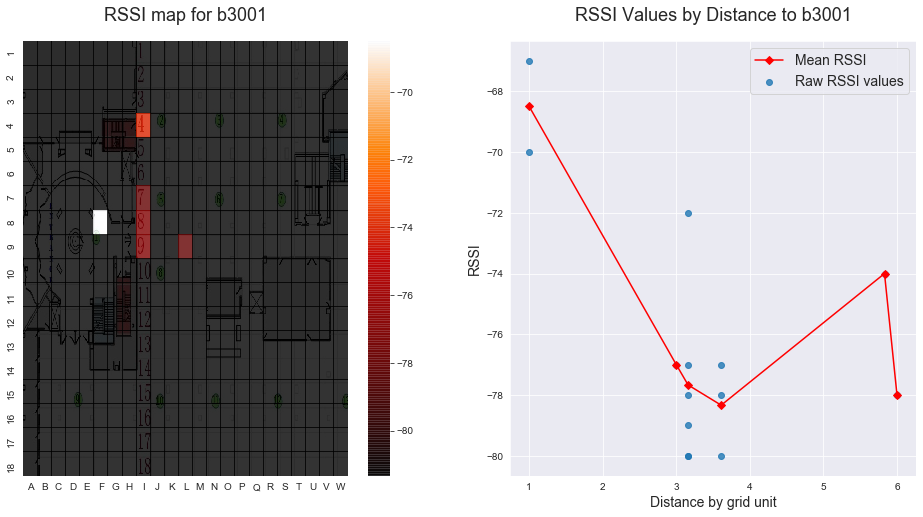

In [18]:
b01 = plot_Signal2Space('b3001')

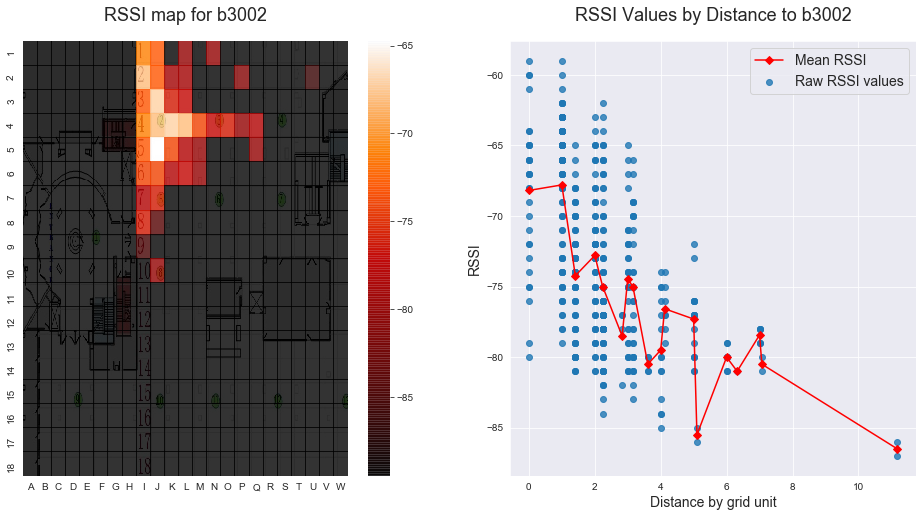

In [19]:
b02 = plot_Signal2Space('b3002')

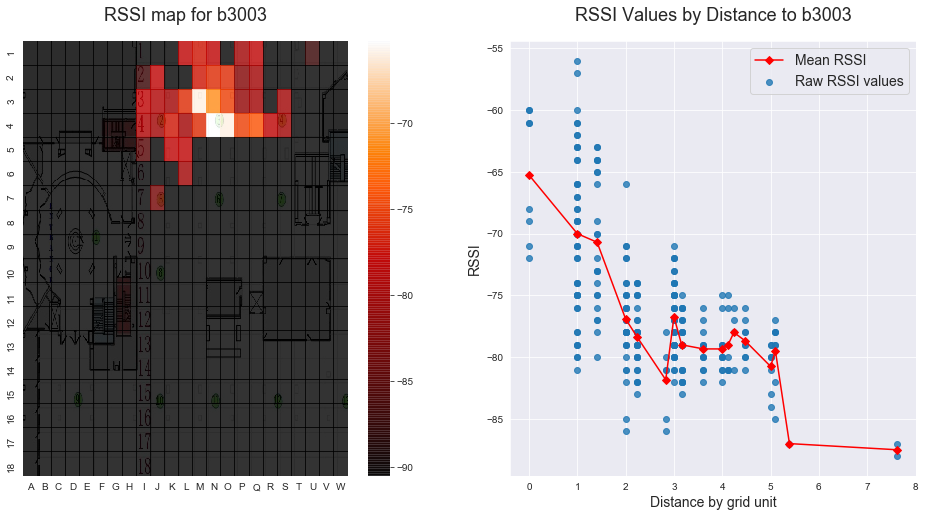

In [20]:
b03 = plot_Signal2Space('b3003')

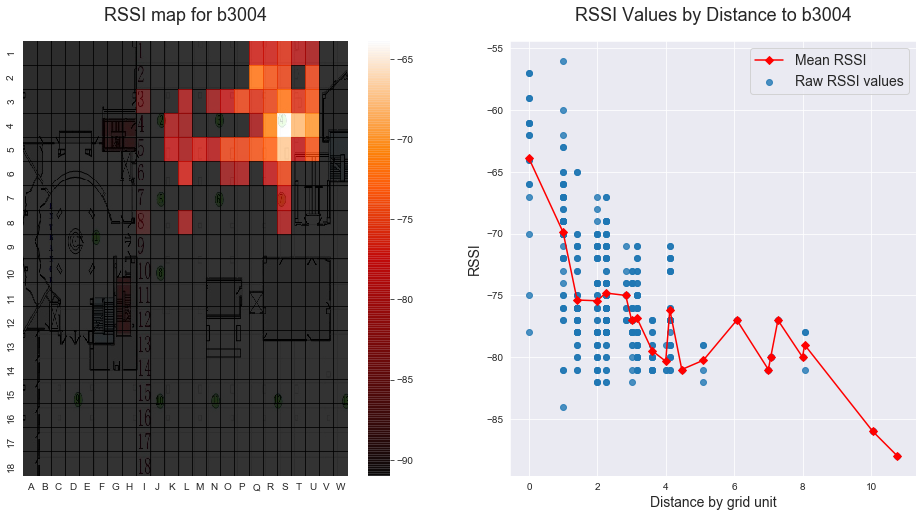

In [21]:
b04 = plot_Signal2Space('b3004')

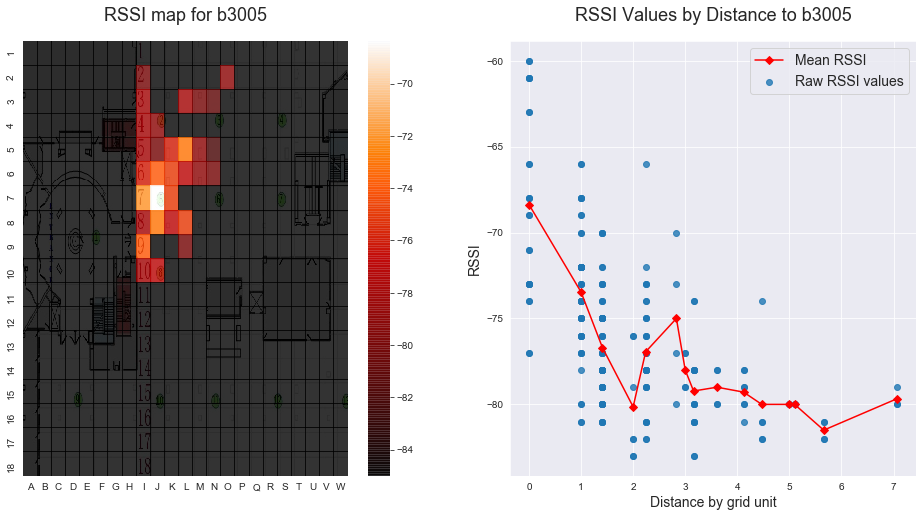

In [22]:
b05 = plot_Signal2Space('b3005')

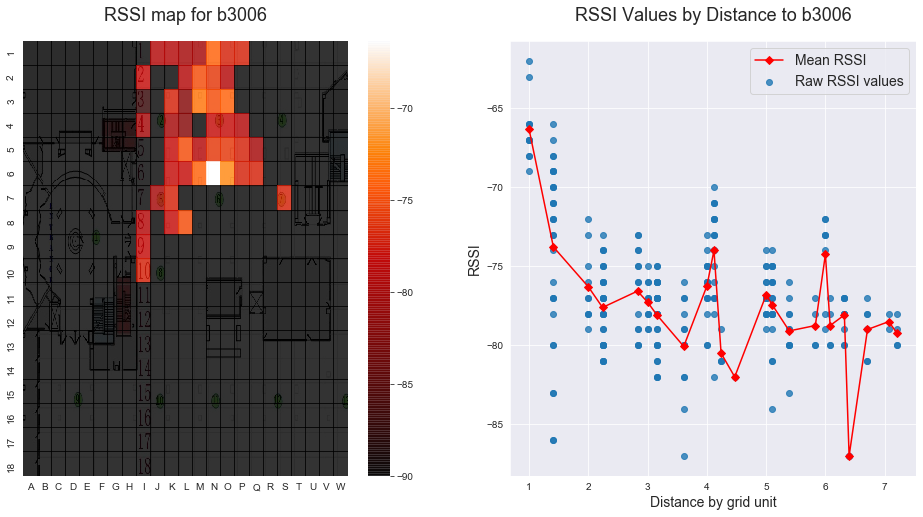

In [23]:
b06 = plot_Signal2Space('b3006')

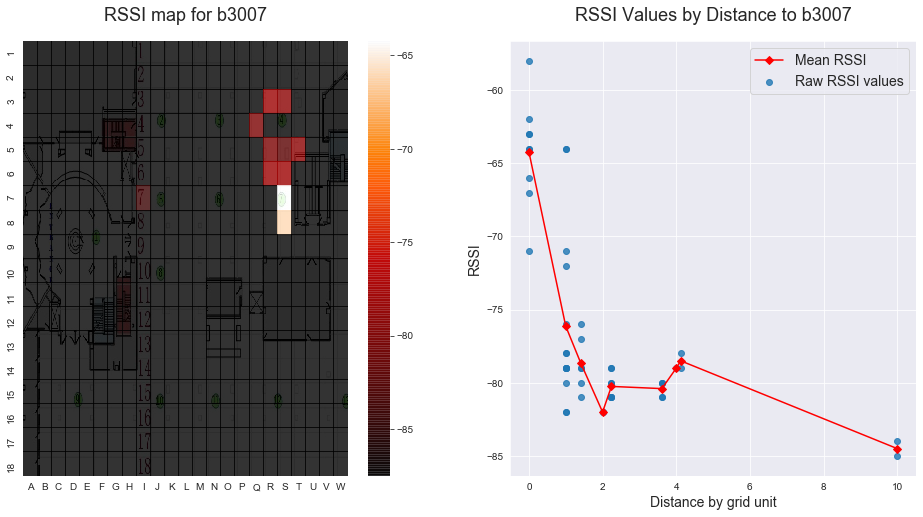

In [24]:
b07 = plot_Signal2Space('b3007')

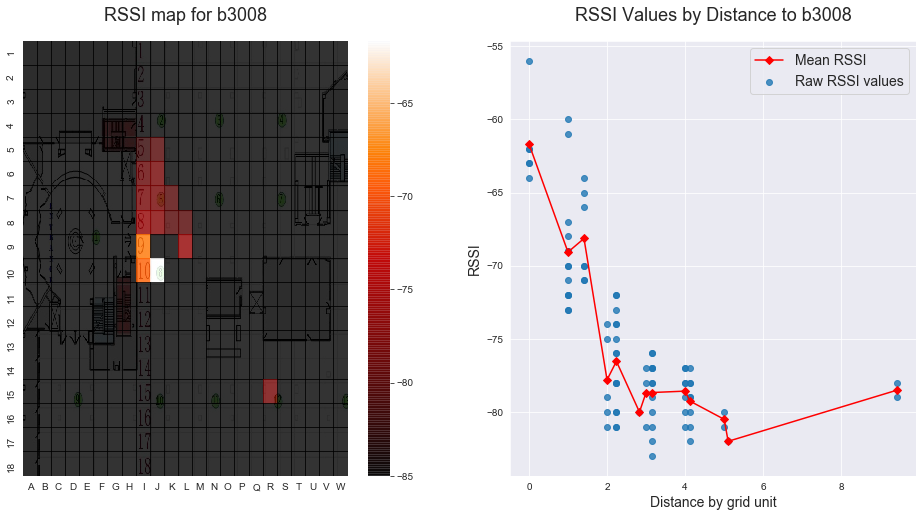

In [25]:
b08 = plot_Signal2Space('b3008')

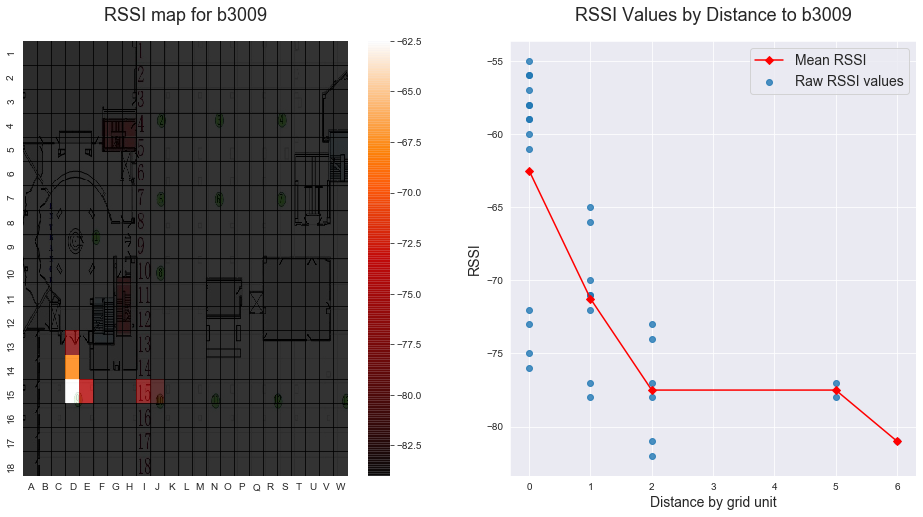

In [26]:
b09 = plot_Signal2Space('b3009')

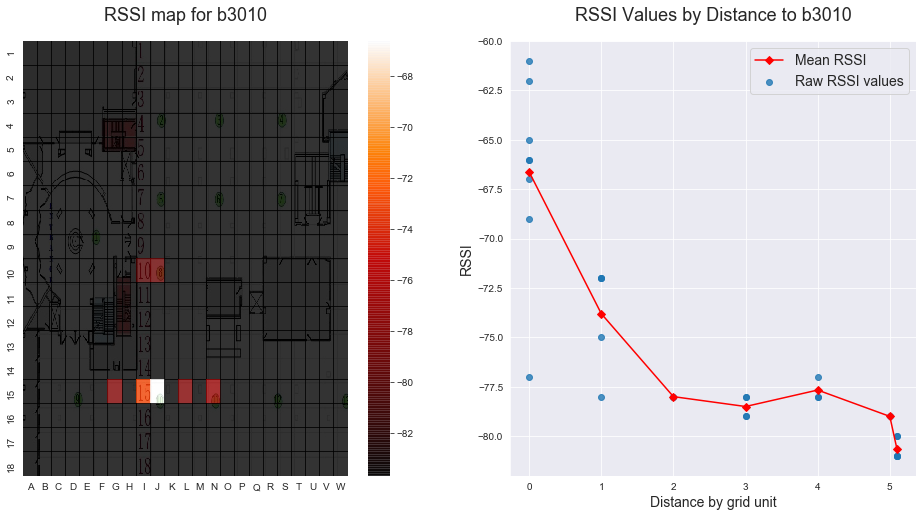

In [27]:
b10 = plot_Signal2Space('b3010')

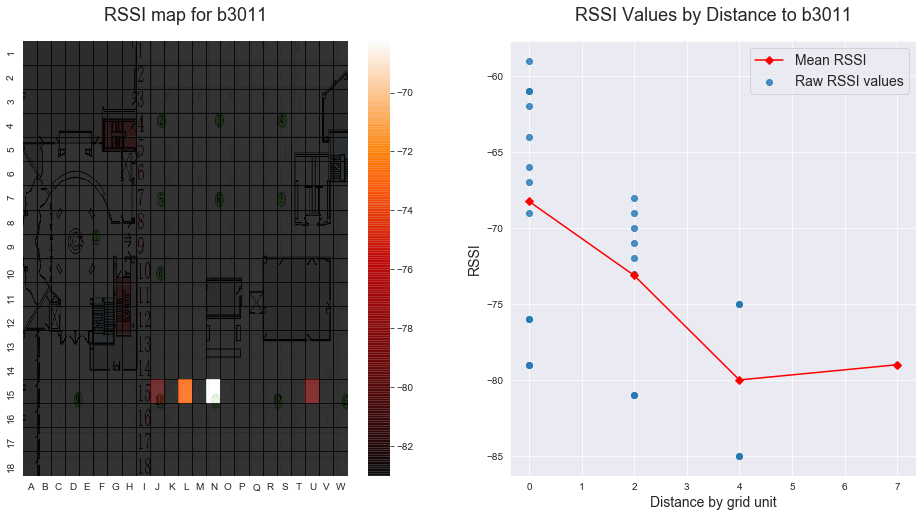

In [28]:
b11 = plot_Signal2Space('b3011')

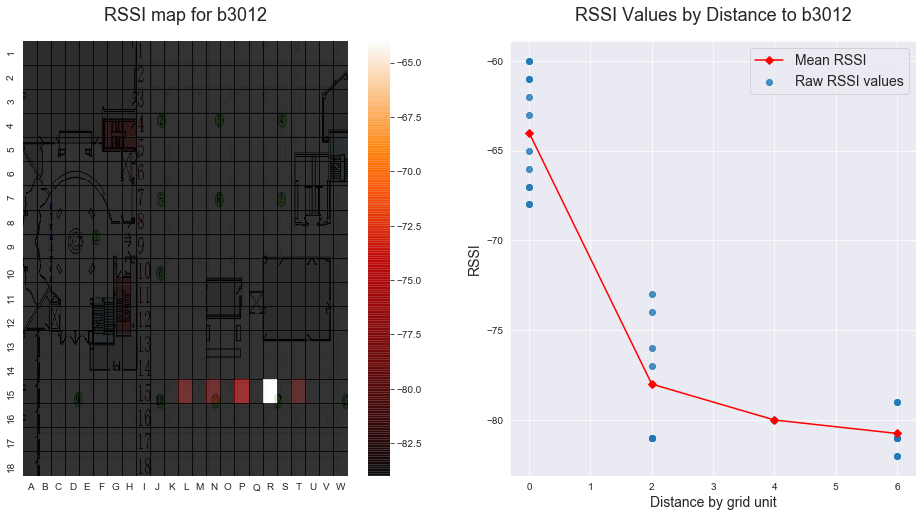

In [29]:
b12 = plot_Signal2Space('b3012')

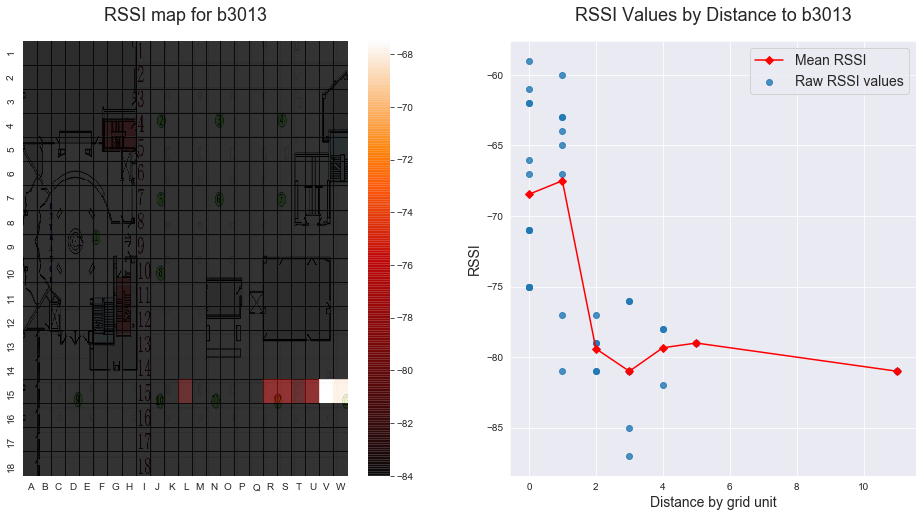

In [30]:
b13 = plot_Signal2Space('b3013')

### RSSI Readings on Grid Locations

In [31]:
# PLOT FUNCTION

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

meanLeg = [Line2D([0], [0], marker='D', color='red', label='Mean RSSI', markersize=12)]

def plot_Signals(location):
    df = data[data['location'] == location].iloc[:,2:15].copy()
        
    # selects only the columns with values greater than -200
    df = df.loc[:,df.gt(-200).any()]
    df = df[df > -200]

    x_pos = 0;
    fig, ax= plt.subplots()
    for (cName, cData) in df.iteritems():
        ax.scatter(x = [x_pos for x in range(len(cData))], y = cData, alpha = 0.8)
        ax.scatter(x = x_pos, y = np.mean(cData), color = 'red', marker = 'D', s = 100, edgecolors = 'black')
        x_pos += 1;

    ax.set_title("Valid RSSI Readings on : " + location, fontdict = {'size': 18}, pad = 20)
    ax.set_xticks(range(df.shape[1]))
    ax.set_xticklabels(df.columns, size = 14)
    ax.set_xlabel("Beacons with valid RSSI", size = 14, labelpad  = 10)
    
    ax.set_ylabel("Raw RSSI")
    ax.legend(handles = meanLeg, fontsize = 14)
    plt.show()

**On Beacon Locations**

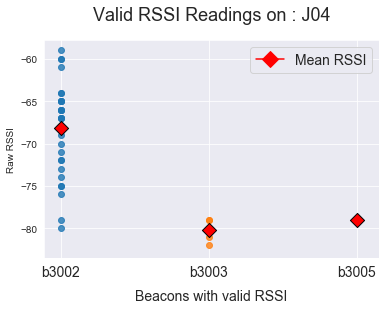

In [32]:
plot_Signals("J04")

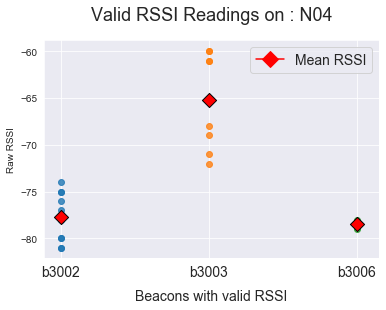

In [33]:
plot_Signals("N04")

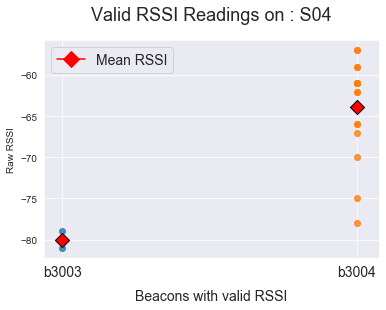

In [34]:
plot_Signals("S04")

**Locations between 2 beacons**

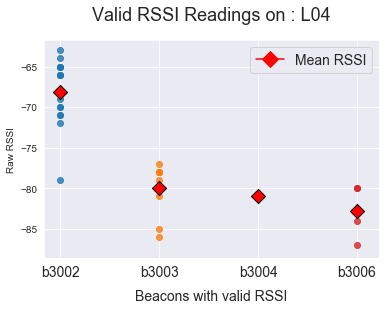

In [35]:
plot_Signals("L04")

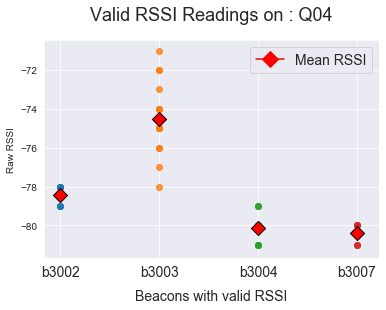

In [36]:
plot_Signals("Q04")

**Locations between multiple beacons**

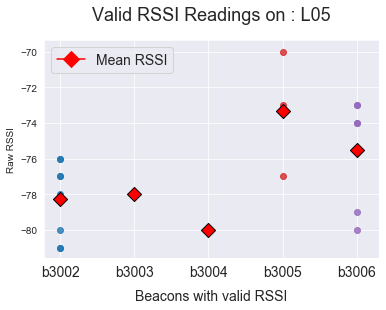

In [37]:
plot_Signals("L05")

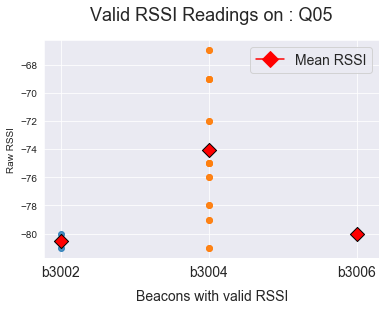

In [38]:
plot_Signals("Q05")

## Exploration in time

In [39]:
# Extract date and time information
import datetime
dataExt = data.copy()
dataExt['_date_']  = [d.date() for d in dataExt['date']]
dataExt['_time_'] = [d.time() for d in dataExt['date']]
dataExt.head()

location                date  b3001  b3002  b3003  b3004  b3005  b3006  \
0      O02 2016-10-18 11:15:21   -200   -200   -200   -200   -200    -78   
1      P01 2016-10-18 11:15:19   -200   -200   -200   -200   -200    -78   
2      P01 2016-10-18 11:15:17   -200   -200   -200   -200   -200    -77   
3      P01 2016-10-18 11:15:15   -200   -200   -200   -200   -200    -77   
4      P01 2016-10-18 11:15:13   -200   -200   -200   -200   -200    -77   

   b3007  b3008  b3009  b3010  b3011  b3012  b3013      _date_    _time_  
0   -200   -200   -200   -200   -200   -200   -200  2016-10-18  11:15:21  
1   -200   -200   -200   -200   -200   -200   -200  2016-10-18  11:15:19  
2   -200   -200   -200   -200   -200   -200   -200  2016-10-18  11:15:17  
3   -200   -200   -200   -200   -200   -200   -200  2016-10-18  11:15:15  
4   -200   -200   -200   -200   -200   -200   -200  2016-10-18  11:15:13

In [40]:
dataExt['_date_'].nunique()

11

In [41]:
dataExt['_date_'].unique()

array([datetime.date(2016, 10, 18), datetime.date(2016, 10, 4),
       datetime.date(2016, 10, 3), datetime.date(2016, 9, 27),
       datetime.date(2016, 9, 21), datetime.date(2016, 9, 19),
       datetime.date(2016, 8, 4), datetime.date(2016, 7, 21),
       datetime.date(2016, 5, 25), datetime.date(2016, 4, 20),
       datetime.date(2016, 4, 19)], dtype=object)

In [42]:
# Visualization function
handle = [Line2D([0], [0], marker='o', color='grey', label='Raw RSSI', markersize=12),
            Line2D([0], [0], marker='o', color='red', label='Distance From Beacon', markersize=12)]

def plot_RSSIinTime(beacon, x_start, x_end = 0):
    # ================================= DATA PREPARATION ===================================

    # extract data on specific data
    temp = data.copy()
    
    # filter valid signals only
    temp = temp[temp[beacon] > -200]

    # calculate distance to beacon
    dist = temp['location'].apply(calc_Distance2Beacon, beacon = beacon)

    if (x_end == 0):
        x_end = len(temp.index) - 1
        
    # select slice of data to plot
    X  = temp.index[range(x_start,x_end)]
    Y = temp[beacon][X]
    Y_dist = dist[X]
    
    # ================================= PLOT ===================================

    # plot title
    timeStart = str(temp['date'][temp.index[x_start]])
    timeEnd = str(temp['date'][temp.index[x_end]])
    title = "RSSI and Distance from " + beacon + " in Time [" + timeStart + ", " + timeEnd + "]"
    
    fig, ax = plt.subplots(figsize = (16,8))
    
    # Plot raw RSSI
    ax.scatter(x = X, y = Y, alpha = 0.8, label = "Raw RSSI values", color = 'grey', lw = 0.1)
    ax.plot(X, Y, color = 'grey')
    
    # ax configuration
    for label in ax.get_yticklabels():
        label.set_color("grey")
        label.set_size(14)
    
    ax.set_ylabel("RSSI", size = 20, color = "grey")
    ax.set_xlabel("Time", size = 20)
    ax.set_title(title, size = 20)
    
    # Plot distance from beacon
    ax2 = ax.twinx()
    ax2.scatter(x = X, y = dist[X], color = 'red', alpha = 0.8, label = "Distance From Beacon", lw = 0.1)
    ax2.plot(X, dist[X], color = 'red')
    
    for label in ax2.get_yticklabels():
        label.set_color("red")
        label.set_size(14)
    
    ax2.set_ylabel("Distance From Beacon", size = 18, color = "red")
    
    ax2.legend(handles = handle, fontsize = 14)
    plt.show()

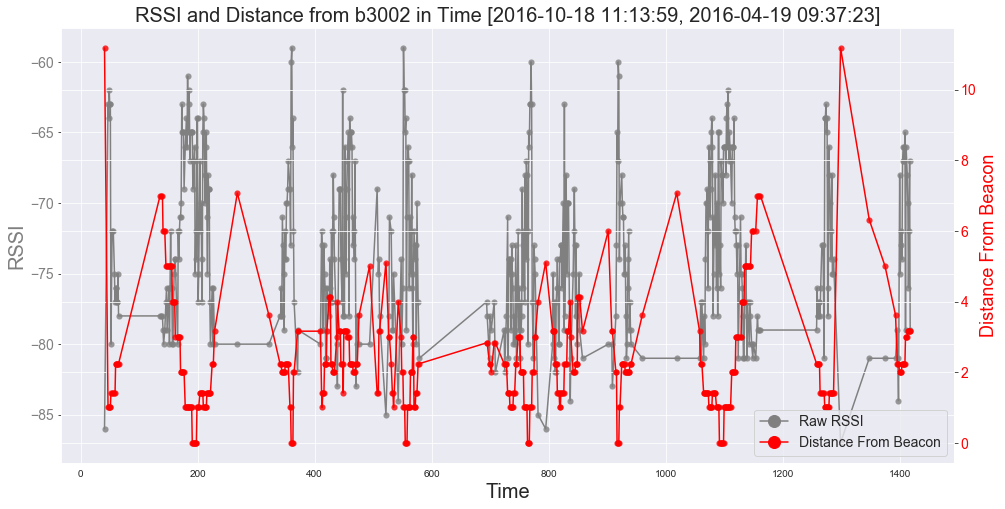

In [43]:
plot_RSSIinTime("b3002", 0)

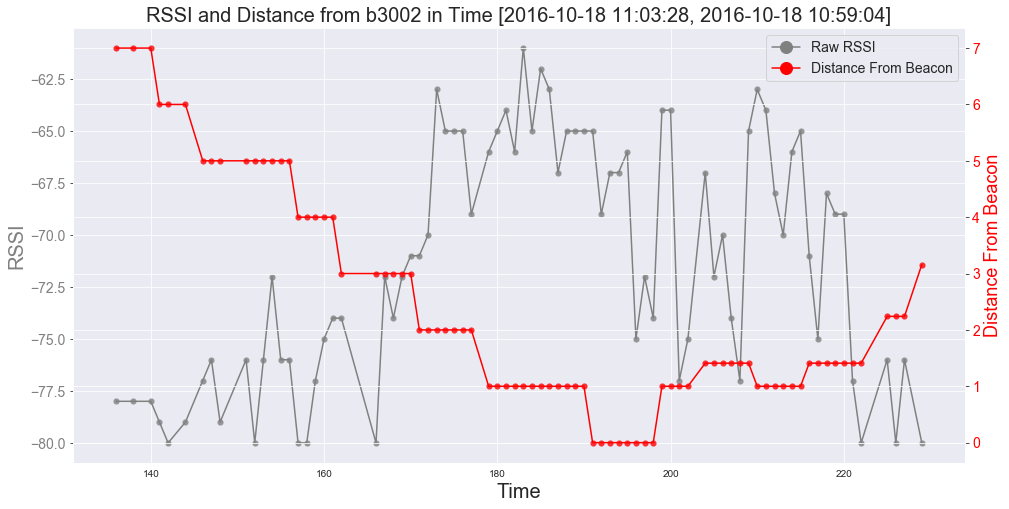

In [44]:
plot_RSSIinTime("b3002", 17, 97)

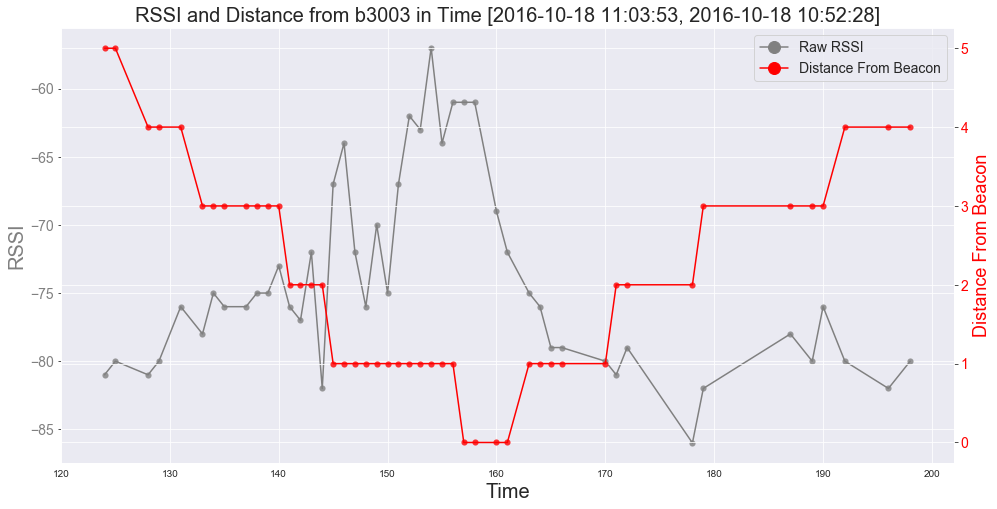

In [45]:
plot_RSSIinTime("b3003", 36, 83)

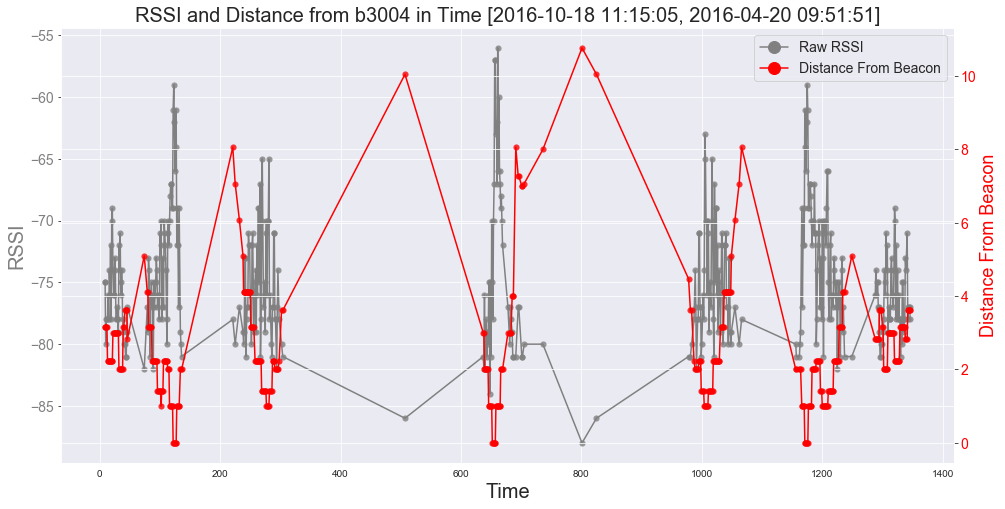

In [46]:
plot_RSSIinTime("b3004", 0)

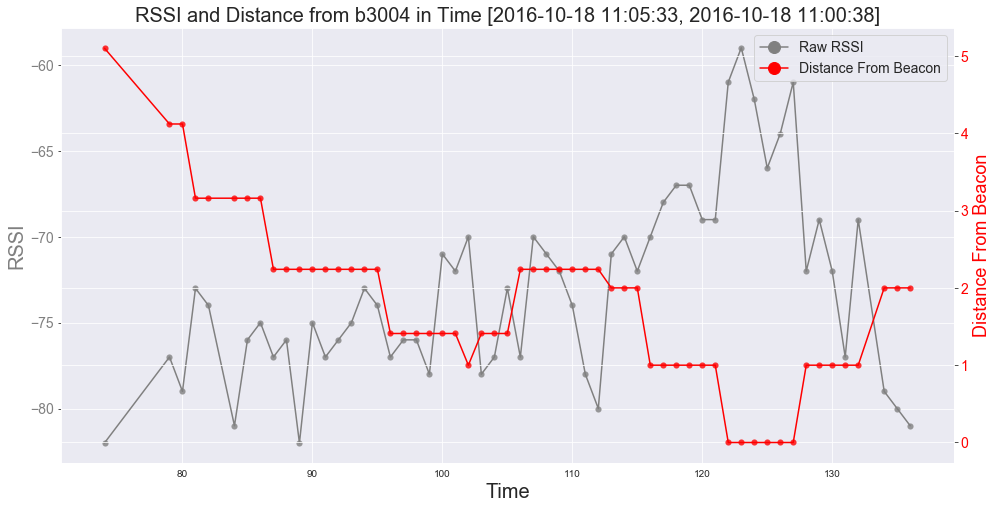

In [47]:
plot_RSSIinTime("b3004", 38, 95)

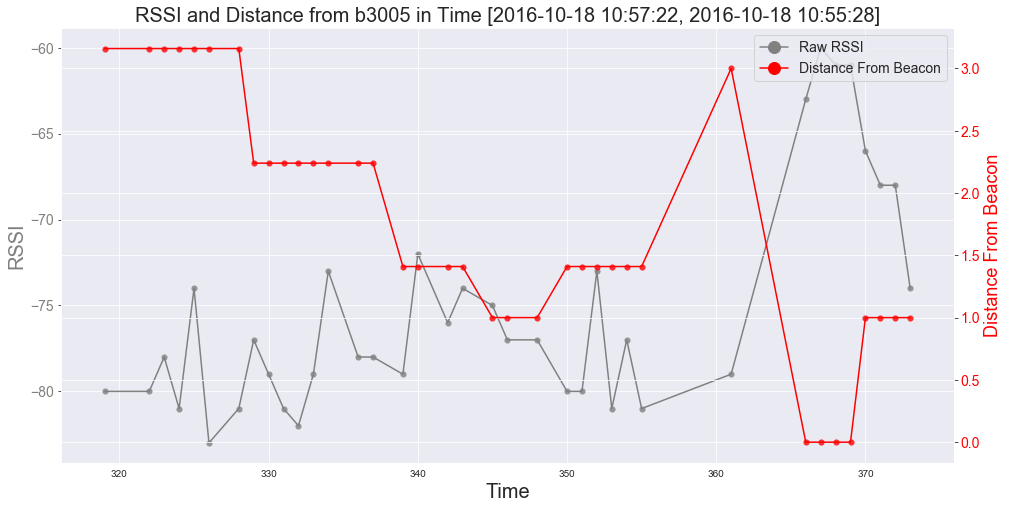

In [48]:
plot_RSSIinTime("b3005", 8, 45)

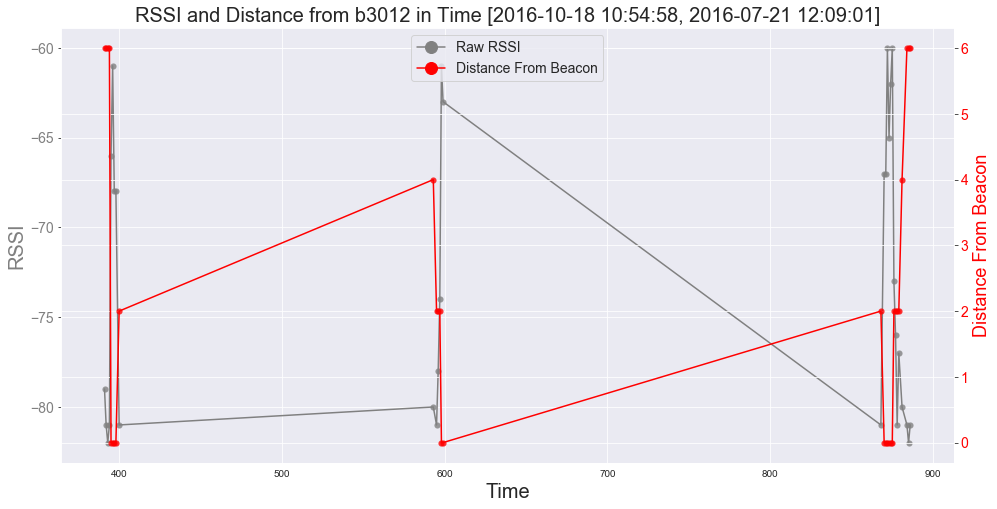

In [49]:
plot_RSSIinTime("b3012", 0)

In [50]:
handle = [Line2D([0], [0], marker='o', color='grey', label='Raw RSSI', markersize=12),
            Line2D([0], [0], marker='o', color='blue', label='10s Moving Average', markersize=12),
            Line2D([0], [0], marker='o', color='red', label='Distance From Beacon', markersize=12)]

def plot_FilteredRSSIinTime(beacon, x_start, x_end = 0):
    # ================================= DATA PREPARATION ===================================

    # extract data on specific data
    #temp = dataExt[dataExt['_date_'] == date].copy()
    temp = data.copy()
    # valid signals only
    temp = temp[temp[beacon] > -200]
    # mean filtering
    avg = temp.rolling(window = '10s', on = 'date').mean()
    #avg = temp.rolling(4, ).mean()
    # calculate distance to beacon
    dist = temp['location'].apply(calc_Distance2Beacon, beacon = beacon)

    if (x_end == 0):
        x_end = len(temp.index) - 1
        
    # select slice of data to plot
    X  = temp.index[range(x_start,x_end)]
    Y = temp[beacon][X]
    Y_avg = avg[beacon][X]
    Y_dist = dist[X]
    
    timeStart = str(temp['date'][temp.index[x_start]])
    timeEnd = str(temp['date'][temp.index[x_end]])

    title = "RSSI and Distance from " + beacon + " in Time [" + timeStart + ", " + timeEnd + "]"
    
    # ================================= PLOT ===================================

    fig, ax = plt.subplots(figsize = (16,8))
    # Plot raw RSSI
    ax.scatter(x = X, y = Y, alpha = 0.8, label = "Raw RSSI values", color = 'grey', lw = 0.1)
    ax.plot(X, Y, color = 'grey')

    # Plot Mean RSSI
    ax.scatter(x = X, y = Y_avg, alpha = 0.8, label = "Mean RSSI values", color = 'blue', lw = 0.1)
    ax.plot(X, Y_avg, color = 'blue')
    
    # ax configuration
    for label in ax.get_yticklabels():
        label.set_color("blue")
        label.set_size(14)
    
    ax.set_ylabel("RSSI", size = 20, color = "blue")
    ax.set_xlabel("Time", size = 20)
    ax.set_title(title, size = 20)
    
    # Plot distance from beacon
    ax2 = ax.twinx()
    ax2.scatter(x = X, y = dist[X], color = 'red', alpha = 0.8, label = "Distance From Beacon", lw = 0.1)
    ax2.plot(X, dist[X], color = 'red')
    
    for label in ax2.get_yticklabels():
        label.set_color("red")
        label.set_size(14)
    
    ax2.set_ylabel("Distance From Beacon", size = 18, color = "red")
    
    ax2.legend(handles = handle, fontsize = 14)
    plt.show()

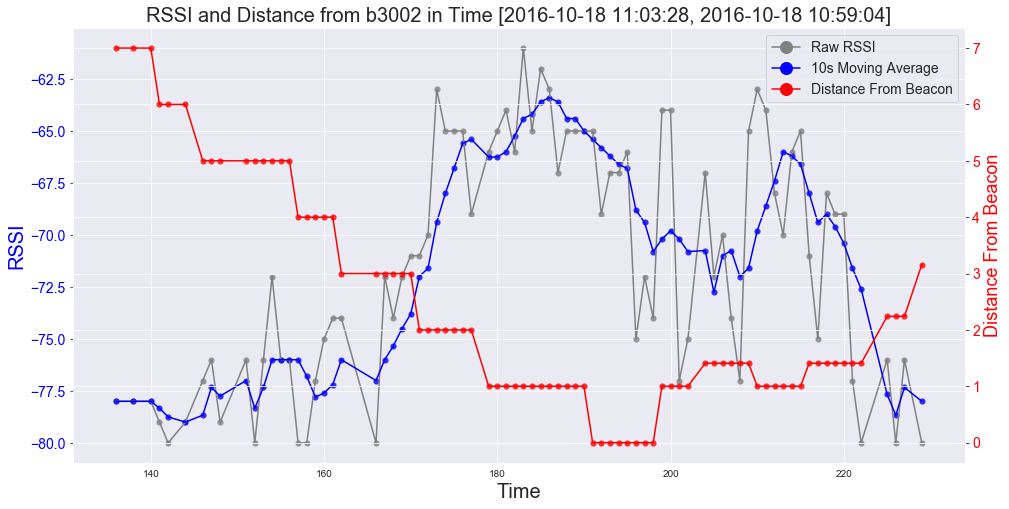

In [51]:
plot_FilteredRSSIinTime("b3002", 17, 97)

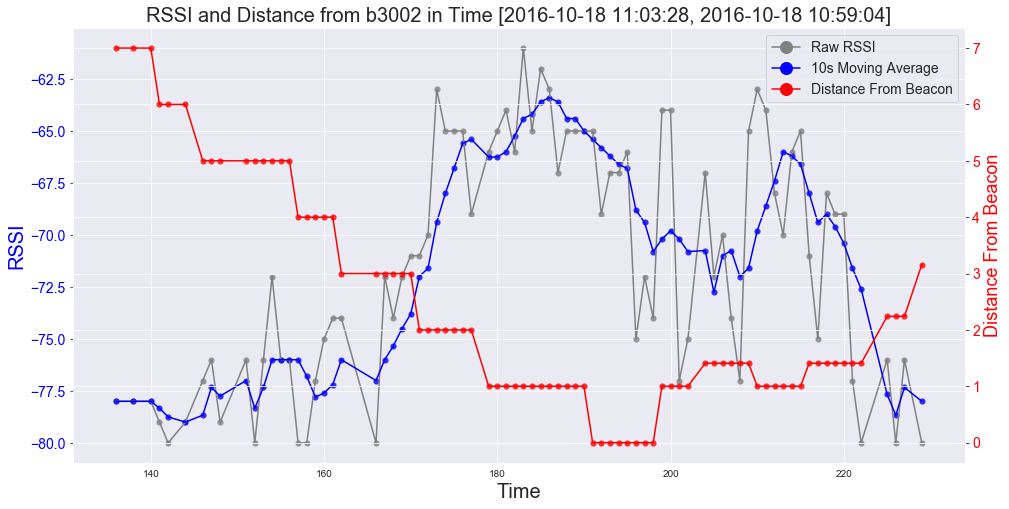

In [52]:
plot_FilteredRSSIinTime("b3002", 17, 97)

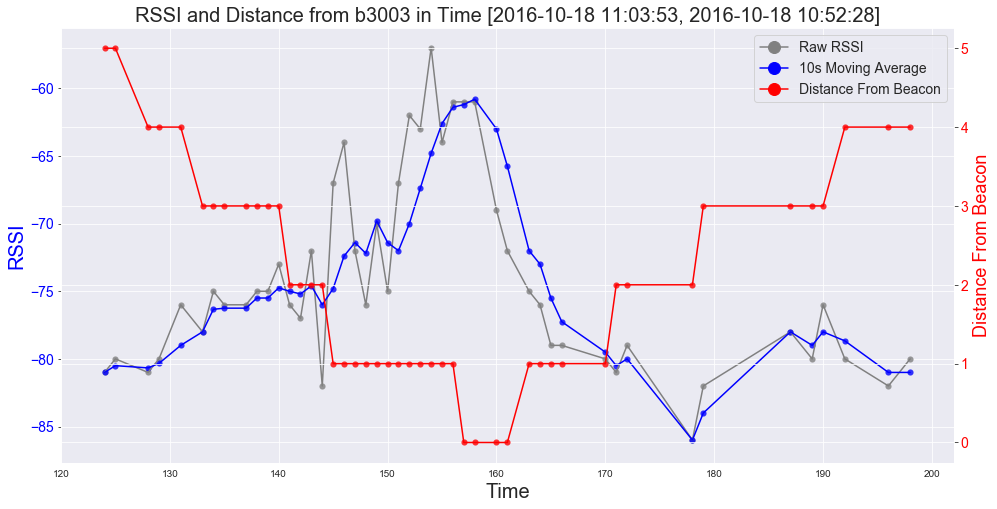

In [53]:
plot_FilteredRSSIinTime("b3003", 36, 83)

### Exploration of relationship of different variables

**Pair plot of all RSSI variables**

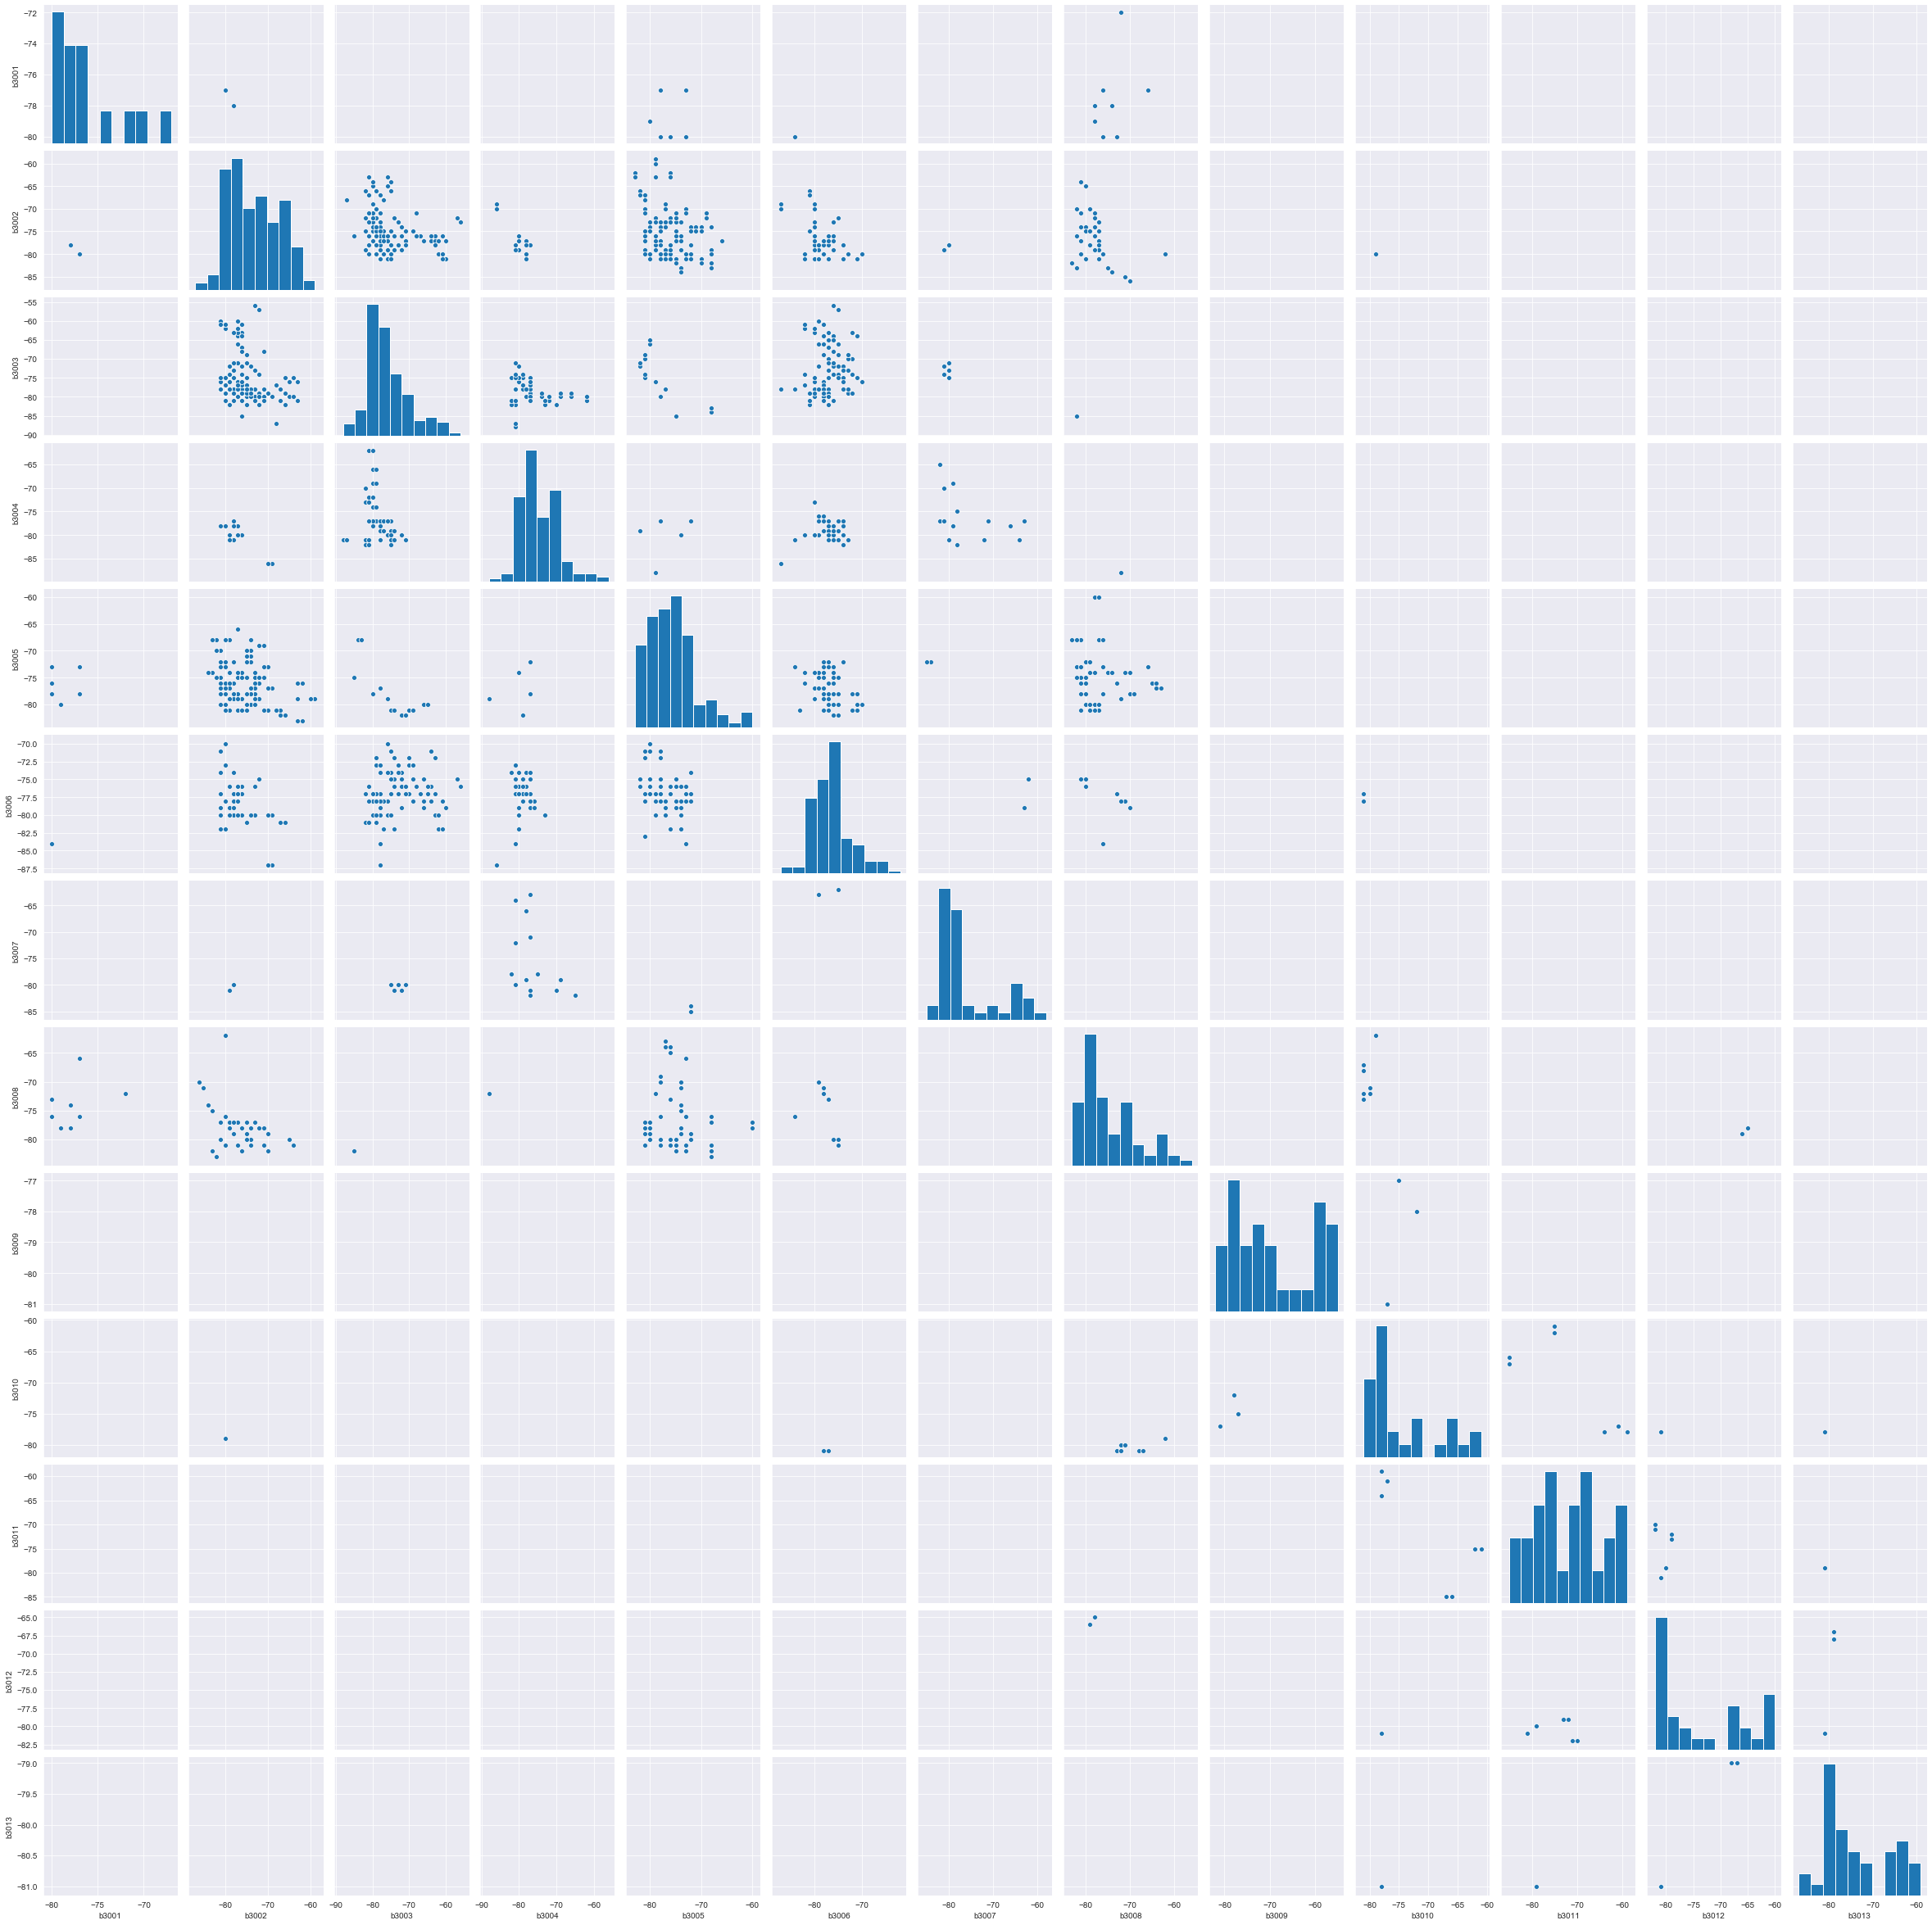

In [54]:
# Pairplot of RSSI readings from all beacons
temp = data.iloc[:,2:].copy()
temp = temp[temp > -200]

sns.pairplot(temp)

**Hypothesis**
* Beacons close to each other will likely have co-occuring valid readings.

**Observations** 
* Beacons that were close to each other had co-occuring valid readings. However there was no directly observable relationships between them.

# Modelling

### Feature Extraction

In [55]:
# Raw RSSI data
X_raw = data.iloc[:,2:15]
y = data['location']# Modelling

In [56]:
# data prep with 10s rolling window
temp = data.copy()
temp.replace(to_replace = -200, value = np.nan, inplace = True)
rollByTime = temp.rolling(window = '10s', on = 'date').mean()
rollByTime.fillna(-200,inplace=True)

X_ave = rollByTime.iloc[:,1:]
y = data['location']

In [57]:
# import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [58]:
# calculate distance between two labels
from math import sqrt
def calc_Distance2Points(pos1, pos2):
    
    x_1, y_1 = convert_Label2XY(pos1)
    
    x_2, y_2 = convert_Label2XY(pos2)
    
    return sqrt((x_1 - x_2)**2 + (y_1 - y_2)**2)

In [59]:
# Creates a dataframe of the distances between to arrays of labels
def calc_distanceError(actual, predicted):
    error = np.zeros(len(actual))
    for i in range(len(actual)):
        error[i] = calc_Distance2Points(actual[i],predicted[i])
    return pd.DataFrame(error)

### GridSearch

In [60]:
#KNN
from sklearn.model_selection import GridSearchCV

kf = KFold(n_splits = 10, shuffle = True, random_state = 20)

params = {'n_neighbors' : list(range(1,10)),
          'weights' : ('uniform', 'distance'),
          'p' : [1,2]}

KNN = KNeighborsClassifier()
clf = GridSearchCV(KNN, params, cv = kf.split(X_ave))
clf.fit(X_ave, y)
resKNN = pd.DataFrame(clf.cv_results_)
resKNN.sort_values(by = 'rank_test_score').head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.005757      0.004084         0.005363        0.004123   
1        0.006386      0.007830         0.003124        0.006249   
5        0.004686      0.007158         0.006249        0.007654   
2        0.003124      0.006248         0.006253        0.007658   
3        0.006249      0.007653         0.003124        0.006249   
9        0.006034      0.007161         0.004178        0.005977   
7        0.004686      0.007158         0.004686        0.007158   
25       0.006249      0.007653         0.004686        0.007158   
19       0.007811      0.007811         0.003125        0.006249   
33       0.004687      0.007159         0.006248        0.007653   

   param_n_neighbors param_p param_weights  \
0                  1       1       uniform   
1                  1       1      distance   
5                  2       1      distance   
2                  1       2       uniform   
3                  1       2      distance   
9                  3       1      distance   
7                  2       2      distance   
25                 7       1      distance   
19                 5       2      distance   
33                 9       1      distance   

                                               params  split0_test_score  \
0    {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}           0.475177   
1   {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}           0.475177   
5   {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}           0.468085   
2    {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}           0.453901   
3   {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}           0.453901   
9   {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}           0.453901   
7   {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}           0.453901   
25  {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}           0.453901   
19  {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}           0.446809   
33  {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}           0.453901   

    split1_test_score  ...  split3_test_score  split4_test_score  \
0            0.432624  ...           0.468085           0.411348   
1            0.432624  ...           0.468085           0.411348   
5            0.446809  ...           0.489362           0.411348   
2            0.432624  ...           0.482270           0.404255   
3            0.432624  ...           0.482270           0.404255   
9            0.446809  ...           0.496454           0.404255   
7            0.439716  ...           0.489362           0.411348   
25           0.432624  ...           0.475177           0.390071   
19           0.432624  ...           0.468085           0.404255   
33           0.432624  ...           0.468085           0.404255   

    split5_test_score  split6_test_score  split7_test_score  \
0            0.428571           0.464286           0.421429   
1            0.428571           0.464286           0.421429   
5            0.414286           0.478571           0.421429   
2            0.421429           0.464286           0.400000   
3            0.421429           0.464286           0.400000   
9            0.400000           0.485714           0.407143   
7            0.414286           0.464286           0.392857   
25           0.385714           0.471429           0.428571   
19           0.392857           0.464286           0.407143   
33           0.378571           0.500000           0.400000   

    split8_test_score  split9_test_score  mean_test_score  std_test_score  \
0            0.442857           0.450000         0.442700        0.020141   
1            0.442857           0.450000         0.442700        0.020141   
5            0.421429           0.428571         0.441251        0.026647   
2            0.442857           0.435714         0.437705        0.024126   
3            0.442857           0.435714         0.437705        0.024126   
9     

In [61]:
#Decision Tree
from sklearn.model_selection import GridSearchCV

kf = KFold(n_splits = 10, shuffle = True, random_state = 20)

params = {'criterion' : ('gini', 'entropy'),
          'min_samples_split' : list(range(2,10)),
          'min_samples_leaf' : list(range(2,10))}

DTree = DecisionTreeClassifier()
clf = GridSearchCV(DTree, params, cv = kf.split(X_raw))
clf.fit(X_raw, y)
resDTree = pd.DataFrame(clf.cv_results_)
resDTree.sort_values(by = 'rank_test_score').head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.004874      0.000543         0.001101        0.000299   
1        0.003227      0.004663         0.001865        0.004619   
2        0.003124      0.006248         0.001562        0.004686   
3        0.006385      0.007828         0.000000        0.000000   
5        0.003124      0.006248         0.001559        0.004676   
4        0.004265      0.004317         0.000462        0.000481   
6        0.004690      0.007164         0.000000        0.000000   
13       0.003124      0.006249         0.001562        0.004687   
7        0.004686      0.007158         0.001562        0.004687   
20       0.006248      0.007653         0.000000        0.000000   

   param_criterion param_min_samples_leaf param_min_samples_split  \
0             gini                      2                       2   
1             gini                      2                       3   
2             gini                      2                       4   
3             gini                      2                       5   
5             gini                      2                       7   
4             gini                      2                       6   
6             gini                      2                       8   
13            gini                      3                       7   
7             gini                      2                       9   
20            gini                      4                       6   

                                               params  split0_test_score  \
0   {'criterion': 'gini', 'min_samples_leaf': 2, '...           0.269504   
1   {'criterion': 'gini', 'min_samples_leaf': 2, '...           0.276596   
2   {'criterion': 'gini', 'min_samples_leaf': 2, '...           0.262411   
3   {'criterion': 'gini', 'min_samples_leaf': 2, '...           0.255319   
5   {'criterion': 'gini', 'min_samples_leaf': 2, '...           0.226950   
4   {'criterion': 'gini', 'min_samples_leaf': 2, '...           0.241135   
6   {'criterion': 'gini', 'min_samples_leaf': 2, '...           0.248227   
13  {'criterion': 'gini', 'min_samples_leaf': 3, '...           0.255319   
7   {'criterion': 'gini', 'min_samples_leaf': 2, '...           0.241135   
20  {'criterion': 'gini', 'min_samples_leaf': 4, '...           0.234043   

    split1_test_score  ...  split3_test_score  split4_test_score  \
0            0.241135  ...           0.170213           0.241135   
1            0.241135  ...           0.170213           0.241135   
2            0.234043  ...           0.170213           0.241135   
3            0.234043  ...           0.170213           0.234043   
5            0.234043  ...           0.191489           0.212766   
4            0.234043  ...           0.184397           0.205674   
6            0.234043  ...           0.184397           0.226950   
13           0.205674  ...           0.191489           0.212766   
7            0.219858  ...           0.184397           0.219858   
20           0.219858  ...           0.198582           0.205674   

    split5_test_score  split6_test_score  split7_test_score  \
0            0.235714           0.264286           0.264286   
1            0.235714           0.264286           0.264286   
2            0.235714           0.257143           0.264286   
3            0.228571           0.278571           0.257143   
5            0.228571           0.257143           0.271429   
4            0.235714           0.271429           0.250000   
6            0.214286           0.228571           0.278571   
13           0.214286           0.257143           0.250000   
7            0.200000           0.214286           0.271429   
20           0.185714           0.235714           0.250000   

    split8_test_score  split9_test_score  mean_test_score  std_test_score  \
0            0.214286           0.264286         0.240598        0.028618   
1            0.200000           0.264286         0.239169    

### K-folds Cross Validation

**Raw RSSI**

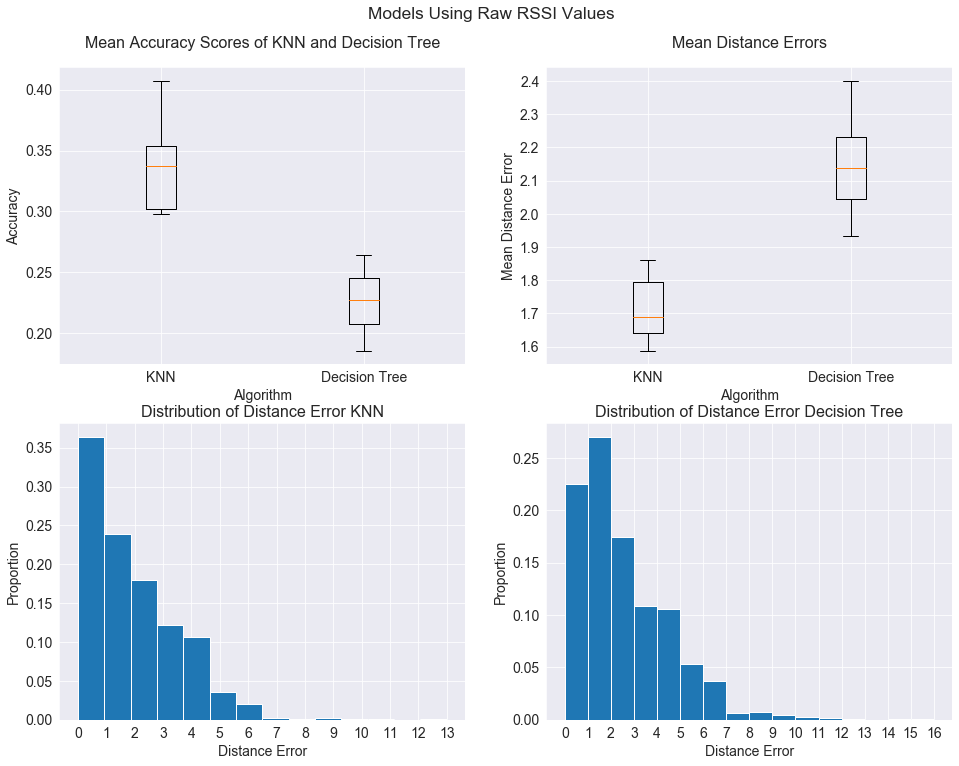

In [62]:
KNN_scores = []
DTree_scores =[]
KNN_meanDistanceError = []
DTree_meanDistanceError = []
KNN_distanceError = pd.DataFrame(columns=['Error'])
DTree_distanceError = pd.DataFrame(columns=['Error'])

# Modelling and validation

kf = KFold(n_splits = 10, shuffle = True, random_state = 20)

for train_index, test_index in kf.split(X_raw):
    X_train, X_test = X_raw.iloc[train_index], X_raw.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #KNN
    KNN = KNeighborsClassifier(n_neighbors = 1, weights = 'distance', p = 1)
    KNNfit = KNN.fit(X_train, y_train)
    KNN_scores.append(KNNfit.score(X_test,y_test))
    KNNpredict = KNNfit.predict(X_test)
    KNNDistError = calc_distanceError(list(y_test), KNNpredict)
    KNN_meanDistanceError.append(KNNDistError.mean()[0])
    for e in KNNDistError[0]:
        KNN_distanceError = KNN_distanceError.append({'Error': e}, ignore_index=True)
    
    # Decision Tree
    DTree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, min_samples_leaf = 4)
    DTreefit = DTree.fit(X_train, y_train)
    DTree_scores.append(DTreefit.score(X_test,y_test))
    DTreepredict = DTreefit.predict(X_test)
    DTreeDistError = calc_distanceError(list(y_test), DTreepredict)
    DTree_meanDistanceError.append(calc_distanceError(list(y_test), DTreepredict).mean()[0])
    for e in DTreeDistError[0]:
        DTree_distanceError = DTree_distanceError.append({'Error': e}, ignore_index=True)

# Plot
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (16,12))
fig.suptitle("Models Using Raw RSSI Values", y = 0.95, x = 0.50, size = 'xx-large')

ax1 = axs[0][0]
ax2 = axs[0][1]
ax3 = axs[1][0]
ax4 = axs[1][1]

# Boxplot mean accuracy
ax1.boxplot(x = [KNN_scores, DTree_scores])
ax1.set_title("Mean Accuracy Scores of KNN and Decision Tree", size = 16, pad = 20)
ax1.set_xticks(range(1,3))
ax1.set_xticklabels(["KNN", "Decision Tree"], size = 14)
for label in ax1.get_yticklabels():
    label.set_size(14)
    
ax1.set_ylabel("Accuracy", size  = 14)
ax1.set_xlabel("Algorithm", size = 14)

# Boxplot mean distance error
ax2.boxplot(x = [KNN_meanDistanceError, DTree_meanDistanceError])
ax2.set_title("Mean Distance Errors", size = 16, pad = 20)
ax2.set_xticks(range(1,3))
ax2.set_xticklabels(["KNN", "Decision Tree"], size = 14)
ax2.set_ylabel("Mean Distance Error", size  = 14)
ax2.set_xlabel("Algorithm", size = 14)
for label in ax2.get_yticklabels():
    label.set_size(14)

# Distance error distribution    
bars = KNN_distanceError['Error'].round()
ax3.hist(bars, density = True, bins = bars.nunique() + 1)
ax3.set_title("Distribution of Distance Error KNN", size = 16)
ax3.set_xticks(range(int(bars.unique().max()) + 1))
ax3.set_xlabel("Distance Error", size  = 14)
ax3.set_ylabel("Proportion", size  = 14)
for label in ax3.get_yticklabels():
    label.set_size(14)
for label in ax3.get_xticklabels():
    label.set_size(14)

bars = DTree_distanceError['Error'].round()
ax4.hist(bars, density = True, bins = bars.nunique() + 1)
ax4.set_title("Distribution of Distance Error Decision Tree",size = 16)
ax4.set_xticks(range(int(bars.unique().max()) + 1))
ax4.set_xlabel("Distance Error", size  = 14)
ax4.set_ylabel("Proportion", size  = 14)
for label in ax4.get_yticklabels():
    label.set_size(14)
for label in ax4.get_xticklabels():
    label.set_size(14)

plt.show()

In [63]:
# KNN Statistics
KNN_scoresDf = pd.DataFrame(KNN_scores, columns = ["KNN"])
KNN_DistErrorDf = pd.DataFrame(KNN_meanDistanceError, columns = ["KNN_Dist"]) 
# DTree Statistics
DTree_scoresDf = pd.DataFrame(DTree_scores, columns = ["DTree"])
DTree_DistErrorDf = pd.DataFrame(DTree_meanDistanceError, columns = ["DTree_Dist"])
Stat_RawRSSI = pd.concat([KNN_scoresDf.describe(),DTree_scoresDf.describe(),KNN_DistErrorDf.describe(),DTree_DistErrorDf.describe()], axis = 1)
Stat_RawRSSI

KNN      DTree   KNN_Dist  DTree_Dist
count  10.000000  10.000000  10.000000   10.000000
mean    0.337452   0.224929   1.715356    2.144438
std     0.037808   0.026003   0.098438    0.140047
min     0.297872   0.185714   1.588379    1.934649
25%     0.301976   0.207827   1.641247    2.045216
50%     0.336879   0.226950   1.688469    2.137249
75%     0.353571   0.245099   1.795596    2.229937
max     0.407143   0.264286   1.861277    2.399992

**Moving Average RSSI**

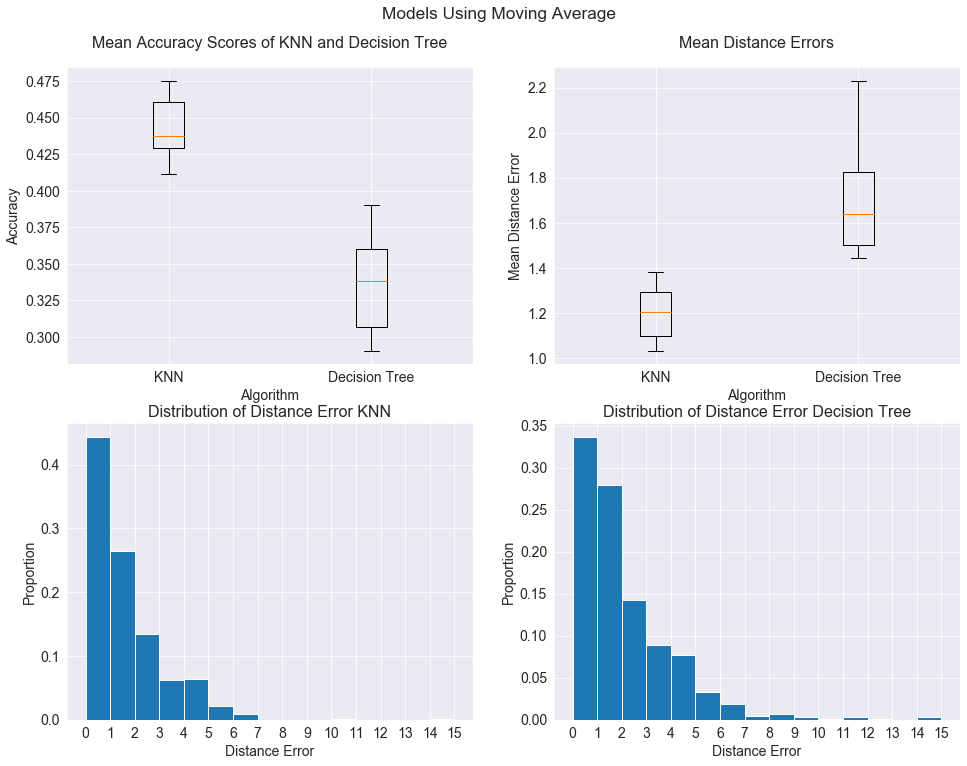

In [71]:
KNN_scores = []
DTree_scores =[]
KNN_meanDistanceError = []
DTree_meanDistanceError = []
KNN_distanceError = pd.DataFrame(columns=['Error'])
DTree_distanceError = pd.DataFrame(columns=['Error'])

kf = KFold(n_splits = 10, shuffle = True, random_state = 20)

for train_index, test_index in kf.split(X_ave):
    X_train, X_test = X_ave.iloc[train_index], X_ave.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #KNN
    KNN = KNeighborsClassifier(n_neighbors = 1, weights = 'distance', p = 1)
    KNNfit = KNN.fit(X_train, y_train)
    KNN_scores.append(KNNfit.score(X_test,y_test))
    KNNpredict = KNNfit.predict(X_test)
    KNN_meanDistanceError.append(calc_distanceError(list(y_test), KNNpredict).mean()[0])
    for e in calc_distanceError(list(y_test), KNNpredict)[0]:
        KNN_distanceError = KNN_distanceError.append({'Error': e}, ignore_index=True)
    
    
    # Decision Tree
    DTree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, min_samples_leaf = 4)
    DTreefit = DTree.fit(X_train, y_train)
    DTree_scores.append(DTreefit.score(X_test,y_test))
    DTreepredict = DTreefit.predict(X_test)
    DTree_meanDistanceError.append(calc_distanceError(list(y_test), DTreepredict).mean()[0])
    for e in calc_distanceError(list(y_test), DTreepredict)[0]:
        DTree_distanceError = DTree_distanceError.append({'Error': e}, ignore_index=True)
   
    
# Plot
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (16,12))
fig.suptitle("Models Using Moving Average", y = 0.95, x = 0.50, size = 'xx-large')

ax1 = axs[0][0]
ax2 = axs[0][1]
ax3 = axs[1][0]
ax4 = axs[1][1]

# Boxplot mean accuracy
ax1.boxplot(x = [KNN_scores, DTree_scores])
ax1.set_title("Mean Accuracy Scores of KNN and Decision Tree", size = 16, pad = 20)
ax1.set_xticks(range(1,3))
ax1.set_xticklabels(["KNN", "Decision Tree"], size = 14)
for label in ax1.get_yticklabels():
    label.set_size(14)
    
ax1.set_ylabel("Accuracy", size  = 14)
ax1.set_xlabel("Algorithm", size = 14)

# Boxplot mean distance error
ax2.boxplot(x = [KNN_meanDistanceError, DTree_meanDistanceError])
ax2.set_title("Mean Distance Errors", size = 16, pad = 20)
ax2.set_xticks(range(1,3))
ax2.set_xticklabels(["KNN", "Decision Tree"], size = 14)
ax2.set_ylabel("Mean Distance Error", size  = 14)
ax2.set_xlabel("Algorithm", size = 14)
for label in ax2.get_yticklabels():
    label.set_size(14)

# Distance error distribution    
bars = KNN_distanceError['Error'].round()
ax3.hist(bars, density = True, bins = 15)
ax3.set_title("Distribution of Distance Error KNN", size = 16)
ax3.set_xticks(range(int(bars.unique().max()) + 1))
ax3.set_xlabel("Distance Error", size  = 14)
ax3.set_ylabel("Proportion", size  = 14)
for label in ax3.get_yticklabels():
    label.set_size(14)
for label in ax3.get_xticklabels():
    label.set_size(14)

bars = DTree_distanceError['Error'].round()
ax4.hist(bars, density = True, bins = bars.nunique() + 1)
ax4.set_title("Distribution of Distance Error Decision Tree",size = 16)
ax4.set_xticks(range(int(bars.unique().max()) + 1))
ax4.set_xlabel("Distance Error", size  = 14)
ax4.set_ylabel("Proportion", size  = 14)
for label in ax4.get_yticklabels():
    label.set_size(14)
for label in ax4.get_xticklabels():
    label.set_size(14)

plt.show()

In [65]:
KNN_distanceError['Error'].round().value_counts()

0.0     622
1.0     372
2.0     189
4.0      89
3.0      88
5.0      30
6.0      13
10.0      1
15.0      1
Name: Error, dtype: int64

In [66]:
# KNN Statistics
KNN_scoresDf = pd.DataFrame(KNN_scores, columns = ["KNN"])
KNN_DistErrorDf = pd.DataFrame(KNN_meanDistanceError, columns = ["KNN_Dist"]) 
# DTree Statistics
DTree_scoresDf = pd.DataFrame(DTree_scores, columns = ["DTree"])
DTree_DistErrorDf = pd.DataFrame(DTree_meanDistanceError, columns = ["DTree_Dist"])
Stat_RawRSSI = pd.concat([KNN_scoresDf.describe(),DTree_scoresDf.describe(),KNN_DistErrorDf.describe(),DTree_DistErrorDf.describe()], axis = 1)
Stat_RawRSSI

KNN      DTree   KNN_Dist  DTree_Dist
count  10.000000  10.000000  10.000000   10.000000
mean    0.442700   0.338050   1.200625    1.695411
std     0.021230   0.034068   0.124459    0.240823
min     0.411348   0.292857   1.032841    1.427013
25%     0.429585   0.306560   1.098365    1.504698
50%     0.437741   0.338070   1.205694    1.650530
75%     0.460714   0.362500   1.294679    1.827252
max     0.475177   0.390071   1.382341    2.210550

**Effect of increasing the window size**

In [67]:
# data prep with 120s rolling window or 60 datapoints
temp = data.copy()
temp.replace(to_replace = -200, value = np.nan, inplace = True)
rollByTime = temp.rolling(window = '120s', on = 'date').mean()
rollByTime.fillna(-200,inplace=True)

X_ave120 = rollByTime.iloc[:,1:]
y = data['location']

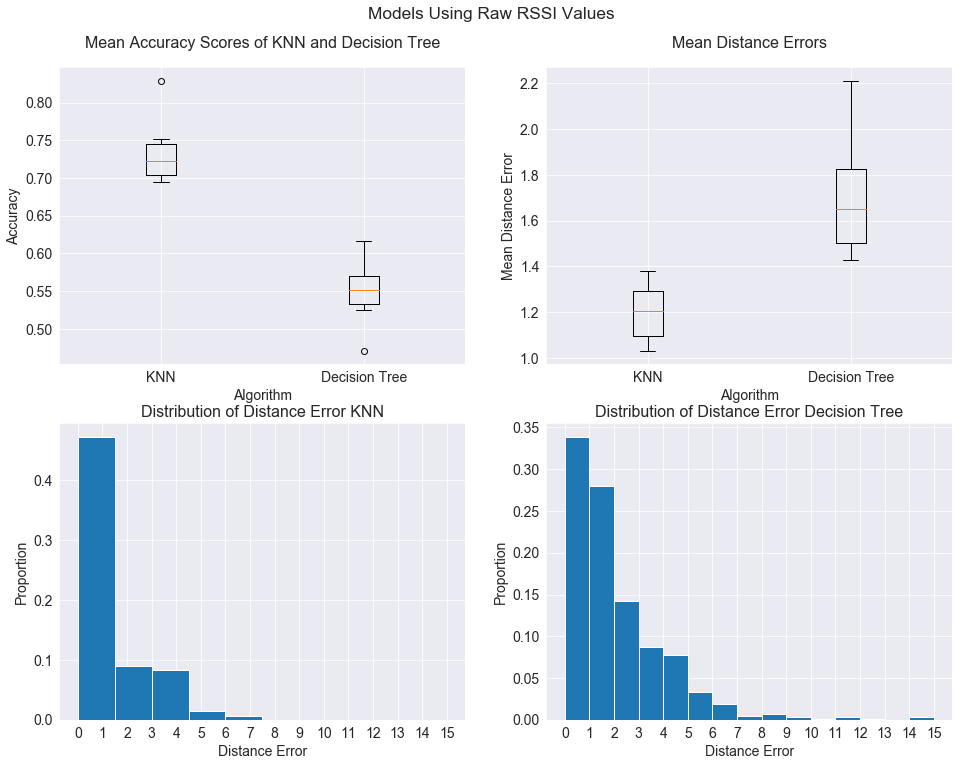

In [68]:
KNN_scores = []
DTree_scores =[]

kf = KFold(n_splits = 10, shuffle = True, random_state = 20)

for train_index, test_index in kf.split(X_ave120):
    X_train, X_test = X_ave120.iloc[train_index], X_ave120.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #KNN
    KNN = KNeighborsClassifier(n_neighbors = 1, weights = 'distance', p = 1)
    KNNfit = KNN.fit(X_train, y_train)
    KNN_scores.append(KNNfit.score(X_test,y_test))
    
    # Decision Tree
    DTree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, min_samples_leaf = 4)
    DTreefit = DTree.fit(X_train, y_train)
    DTree_scores.append(DTreefit.score(X_test,y_test))
    
# Plot
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (16,12))
fig.suptitle("Models Using Raw RSSI Values", y = 0.95, x = 0.50, size = 'xx-large')

ax1 = axs[0][0]
ax2 = axs[0][1]
ax3 = axs[1][0]
ax4 = axs[1][1]

# Boxplot mean accuracy
ax1.boxplot(x = [KNN_scores, DTree_scores])
ax1.set_title("Mean Accuracy Scores of KNN and Decision Tree", size = 16, pad = 20)
ax1.set_xticks(range(1,3))
ax1.set_xticklabels(["KNN", "Decision Tree"], size = 14)
for label in ax1.get_yticklabels():
    label.set_size(14)
    
ax1.set_ylabel("Accuracy", size  = 14)
ax1.set_xlabel("Algorithm", size = 14)

# Boxplot mean distance error
ax2.boxplot(x = [KNN_meanDistanceError, DTree_meanDistanceError])
ax2.set_title("Mean Distance Errors", size = 16, pad = 20)
ax2.set_xticks(range(1,3))
ax2.set_xticklabels(["KNN", "Decision Tree"], size = 14)
ax2.set_ylabel("Mean Distance Error", size  = 14)
ax2.set_xlabel("Algorithm", size = 14)
for label in ax2.get_yticklabels():
    label.set_size(14)

# Distance error distribution    
bars = KNN_distanceError['Error'].round()
ax3.hist(bars, density = True, bins = bars.nunique() + 1)
ax3.set_title("Distribution of Distance Error KNN", size = 16)
ax3.set_xticks(range(int(bars.unique().max()) + 1))
ax3.set_xlabel("Distance Error", size  = 14)
ax3.set_ylabel("Proportion", size  = 14)
for label in ax3.get_yticklabels():
    label.set_size(14)
for label in ax3.get_xticklabels():
    label.set_size(14)

bars = DTree_distanceError['Error'].round()
ax4.hist(bars, density = True, bins = bars.nunique() + 1)
ax4.set_title("Distribution of Distance Error Decision Tree",size = 16)
ax4.set_xticks(range(int(bars.unique().max()) + 1))
ax4.set_xlabel("Distance Error", size  = 14)
ax4.set_ylabel("Proportion", size  = 14)
for label in ax4.get_yticklabels():
    label.set_size(14)
for label in ax4.get_xticklabels():
    label.set_size(14)

plt.show()

In [69]:
# KNN Statistics
KNN_scoresDf = pd.DataFrame(KNN_scores, columns = ["KNN"])
KNN_DistErrorDf = pd.DataFrame(KNN_meanDistanceError, columns = ["KNN_Dist"]) 
# DTree Statistics
DTree_scoresDf = pd.DataFrame(DTree_scores, columns = ["DTree"])
DTree_DistErrorDf = pd.DataFrame(DTree_meanDistanceError, columns = ["DTree_Dist"])
Stat_RawRSSI = pd.concat([KNN_scoresDf.describe(),DTree_scoresDf.describe(),KNN_DistErrorDf.describe(),DTree_DistErrorDf.describe()], axis = 1)
Stat_RawRSSI

KNN      DTree   KNN_Dist  DTree_Dist
count  10.000000  10.000000  10.000000   10.000000
mean    0.731707   0.552989   1.200625    1.695411
std     0.039385   0.041646   0.124459    0.240823
min     0.695035   0.471429   1.032841    1.427013
25%     0.704078   0.532953   1.098365    1.504698
50%     0.722442   0.551596   1.205694    1.650530
75%     0.745124   0.570137   1.294679    1.827252
max     0.828571   0.617021   1.382341    2.210550

In [70]:
# Note: Although increasing the window size significantly increases the accuracy of the models,
# it was found that this method distorts the data avaialable effectively creating new data points instead
# of acting as a simple filter. After all this filtering method was treated as a much simpler substitute to
# commonly used filtering methods just to observe the positive effects of attempting to suppress the noise
# present in the RSSI readings